# 1. Library Import for Analysis 

### In this section all required libraries are imported to execure the complete analysis

In [2]:
library(XML) # read csv file
library(xml2) # read csv file
library(ggplot2) # graphics
library(corrplot) # correlation plot
library(moments) # moments calculation
library(car) # Companion to Applied Regression 
library(mctest) # Multicollinearity Diagnostics
library(perturb) # Collinearity
library(base) # Data Manupulation
library(lmtest) # LM Test for heteroscedasticity
library(leaps) # Subset selection
library(MASS) # Applied Statistics
library(glmnet) # Generalized Linear Model
library(dplyr) # Advanced Data Manupulation

# 2. Data Import

### In this section data is directly imported from Data World by accessing their pre-defined query

In [5]:
cancer_raw <- read.csv("https://query.data.world/s/ss5jebdatn2h72nryr43tegiq2jg4u")

### Preview of the data set which is imported :

In [6]:
head(cancer_raw)

avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1397,469,164.9,489.8,61898,260131,11.2,499.74820,"(61494.5, 125635]",39.3,...,NA,41.6,32.9,14.0,81.78053,2.5947283,4.8218571,1.8434785,52.85608,6.118831
173,70,161.3,411.6,48127,43269,18.6,23.11123,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.22851,0.9691025,2.2462326,3.7413515,45.37250,4.333096
102,50,174.7,349.7,49348,21026,14.6,47.56016,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.92219,0.7396734,0.4658982,2.7473583,54.44487,3.729488
427,202,194.8,430.4,44243,75882,17.1,342.63725,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.74469,0.7826260,1.1613587,1.3626432,51.02151,4.603841
57,26,144.4,350.1,49955,10321,12.5,0.00000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.10402,0.2701920,0.6658304,0.4921355,54.02746,6.796657
428,152,176.0,505.4,52313,61023,15.6,180.25990,"(51046.4, 54545.6]",45.4,...,38.8,32.6,43.2,20.2,84.88263,1.6532052,1.5380566,3.3146354,51.22036,4.964476


# 3. Data pre-processing

### In this section whole data set will be pre-processed for doing analysis

### Structure of the Data:

In [7]:
str(cancer_raw)

'data.frame':	3047 obs. of  34 variables:
 $ avgAnnCount            : num  1397 173 102 427 57 ...
 $ avgDeathsPerYear       : int  469 70 50 202 26 152 97 71 36 1380 ...
 $ TARGET_deathRate       : num  165 161 175 195 144 ...
 $ incidenceRate          : num  490 412 350 430 350 ...
 $ medIncome              : int  61898 48127 49348 44243 49955 52313 37782 40189 42579 60397 ...
 $ popEst2015             : int  260131 43269 21026 75882 10321 61023 41516 20848 13088 843954 ...
 $ povertyPercent         : num  11.2 18.6 14.6 17.1 12.5 15.6 23.2 17.8 22.3 13.1 ...
 $ studyPerCap            : num  499.7 23.1 47.6 342.6 0 ...
 $ binnedInc              : Factor w/ 10 levels "(34218.1, 37413.8]",..: 9 6 6 4 6 7 2 2 3 8 ...
 $ MedianAge              : num  39.3 33 45 42.8 48.3 45.4 42.6 51.7 49.3 35.8 ...
 $ MedianAgeMale          : num  36.9 32.2 44 42.2 47.8 43.5 42.2 50.8 48.4 34.7 ...
 $ MedianAgeFemale        : num  41.7 33.7 45.8 43.4 48.9 48 43.5 52.5 49.8 37 ...
 $ Geography           

### Summary of the Data:

In [8]:
summary(cancer_raw)

  avgAnnCount      avgDeathsPerYear TARGET_deathRate incidenceRate   
 Min.   :    6.0   Min.   :    3    Min.   : 59.7    Min.   : 201.3  
 1st Qu.:   76.0   1st Qu.:   28    1st Qu.:161.2    1st Qu.: 420.3  
 Median :  171.0   Median :   61    Median :178.1    Median : 453.5  
 Mean   :  606.3   Mean   :  186    Mean   :178.7    Mean   : 448.3  
 3rd Qu.:  518.0   3rd Qu.:  149    3rd Qu.:195.2    3rd Qu.: 480.9  
 Max.   :38150.0   Max.   :14010    Max.   :362.8    Max.   :1206.9  
                                                                     
   medIncome        popEst2015       povertyPercent   studyPerCap     
 Min.   : 22640   Min.   :     827   Min.   : 3.20   Min.   :   0.00  
 1st Qu.: 38883   1st Qu.:   11684   1st Qu.:12.15   1st Qu.:   0.00  
 Median : 45207   Median :   26643   Median :15.90   Median :   0.00  
 Mean   : 47063   Mean   :  102637   Mean   :16.88   Mean   : 155.40  
 3rd Qu.: 52492   3rd Qu.:   68671   3rd Qu.:20.40   3rd Qu.:  83.65  
 Max.   :12563

### Data Dictionary -
- TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities
- avgAnnCount: Mean number of reported cases of cancer diagnosed annually
- avgDeathsPerYear: Mean number of reported mortalities due to cancer
- incidenceRate: Mean per capita (100,000) cancer diagoses
- medianIncome: Median income per county
- popEst2015: Population of county
- povertyPercent: Percent of populace in poverty
- studyPerCap: Per capita number of cancer-related clinical trials per county
- binnedInc: Median income per capita binned by decile
- MedianAge: Median age of county residents
- MedianAgeMale: Median age of male county residents
- MedianAgeFemale: Median age of female county residents
- Geography: County name
- AvgHouseholdSize: Mean household size of county
- PercentMarried: Percent of county residents who are married 
- PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 
- PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 
- PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 
- PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 
- PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 
- PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 
- PctEmployed16_Over: Percent of county residents ages 16 and over employed
- PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed
- PctPrivateCoverage: Percent of county residents with private health coverage 
- PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 
- PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 
- PctPublicCoverage: Percent of county residents with government-provided health coverage 
- PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 
- PctWhite: Percent of county residents who identify as White 
- PctBlack: Percent of county residents who identify as Black 
- PctAsian: Percent of county residents who identify as Asian 
- PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian
- PctMarriedHouseholds: Percent of married households
- BirthRate: Number of live births relative to number of women in county

## 3.1. Discarding Irrelevant Variables

### In this subsection, by looking at structure and summary some irrelevant variable will be discarded

 - Geography is a factor varible which is irrelevant for our analysis.
 - binnedInc is also a irrelevant variable.
 - PctSomeCol18_24 has 2285 missing values which is not suitable for the analysis

### Therefore these variables should be discarded

In [9]:
drop_names <- c("Geography","PctSomeCol18_24","binnedInc")
cancer_1 <- cancer_raw %>% select(-drop_names)

### Variables after discardation:

In [10]:
colnames(cancer_1)

[1] "avgAnnCount"             "avgDeathsPerYear"       
 [3] "TARGET_deathRate"        "incidenceRate"          
 [5] "medIncome"               "popEst2015"             
 [7] "povertyPercent"          "studyPerCap"            
 [9] "MedianAge"               "MedianAgeMale"          
[11] "MedianAgeFemale"         "AvgHouseholdSize"       
[13] "PercentMarried"          "PctNoHS18_24"           
[15] "PctHS18_24"              "PctBachDeg18_24"        
[17] "PctHS25_Over"            "PctBachDeg25_Over"      
[19] "PctEmployed16_Over"      "PctUnemployed16_Over"   
[21] "PctPrivateCoverage"      "PctPrivateCoverageAlone"
[23] "PctEmpPrivCoverage"      "PctPublicCoverage"      
[25] "PctPublicCoverageAlone"  "PctWhite"               
[27] "PctBlack"                "PctAsian"               
[29] "PctOtherRace"            "PctMarriedHouseholds"   
[31] "BirthRate"

## 3.2. Treatment of Missing Values

### In this subsection, columns containing missing values will be replaced accordingly

In [11]:
summary(cancer_1$PctPrivateCoverageAlone)
summary(cancer_1$PctEmployed16_Over)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  15.70   41.00   48.70   48.45   55.60   78.90     609 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  17.60   48.60   54.50   54.15   60.30   80.10     152 

### These two variables have missing values. From the above summary we can see that distributions are almost symetric since mean and median are almost same. Threfore, mean value will be suitable for those missing values.

In [12]:
cancer_1$PctPrivateCoverageAlone[is.na(cancer_1$PctPrivateCoverageAlone)] <- mean(cancer_1$PctPrivateCoverageAlone, na.rm = TRUE)
cancer_1$PctEmployed16_Over[is.na(cancer_1$PctEmployed16_Over)] <- mean(cancer_1$PctEmployed16_Over, na.rm = TRUE)

### Now we have no missing values:

In [13]:
summary(is.na(cancer_1))

 avgAnnCount     avgDeathsPerYear TARGET_deathRate incidenceRate  
 Mode :logical   Mode :logical    Mode :logical    Mode :logical  
 FALSE:3047      FALSE:3047       FALSE:3047       FALSE:3047     
 medIncome       popEst2015      povertyPercent  studyPerCap    
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:3047      FALSE:3047      FALSE:3047      FALSE:3047     
 MedianAge       MedianAgeMale   MedianAgeFemale AvgHouseholdSize
 Mode :logical   Mode :logical   Mode :logical   Mode :logical   
 FALSE:3047      FALSE:3047      FALSE:3047      FALSE:3047      
 PercentMarried  PctNoHS18_24    PctHS18_24      PctBachDeg18_24
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:3047      FALSE:3047      FALSE:3047      FALSE:3047     
 PctHS25_Over    PctBachDeg25_Over PctEmployed16_Over PctUnemployed16_Over
 Mode :logical   Mode :logical     Mode :logical      Mode :logical       
 FALSE:3047      FALSE:3047        FALSE:3047         FALSE:3

## 3.3. Removing some observations

### In this subsection, some of rows will be deleted according to criterion of Median Age column

In [14]:
summary(cancer_1$MedianAge)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.30   37.70   41.00   45.27   44.00  624.00 

### Legitimate value for the Median Age should be 55. Therefore all values greater than 55 will be discarded

In [15]:
cancer_1 <- cancer_1 %>% filter(MedianAge<55)
summary(cancer_1$MedianAge)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.30   37.70   40.90   40.75   43.80   54.80 

# 4. Exploratory Data Analysis

### In this section all visualizations of this data set will be shown

In [16]:
col_name = colnames(cancer_1)
col_name <- append(col_name[1:2], col_name[4:31])

### Histogram for all explanatoy variables:

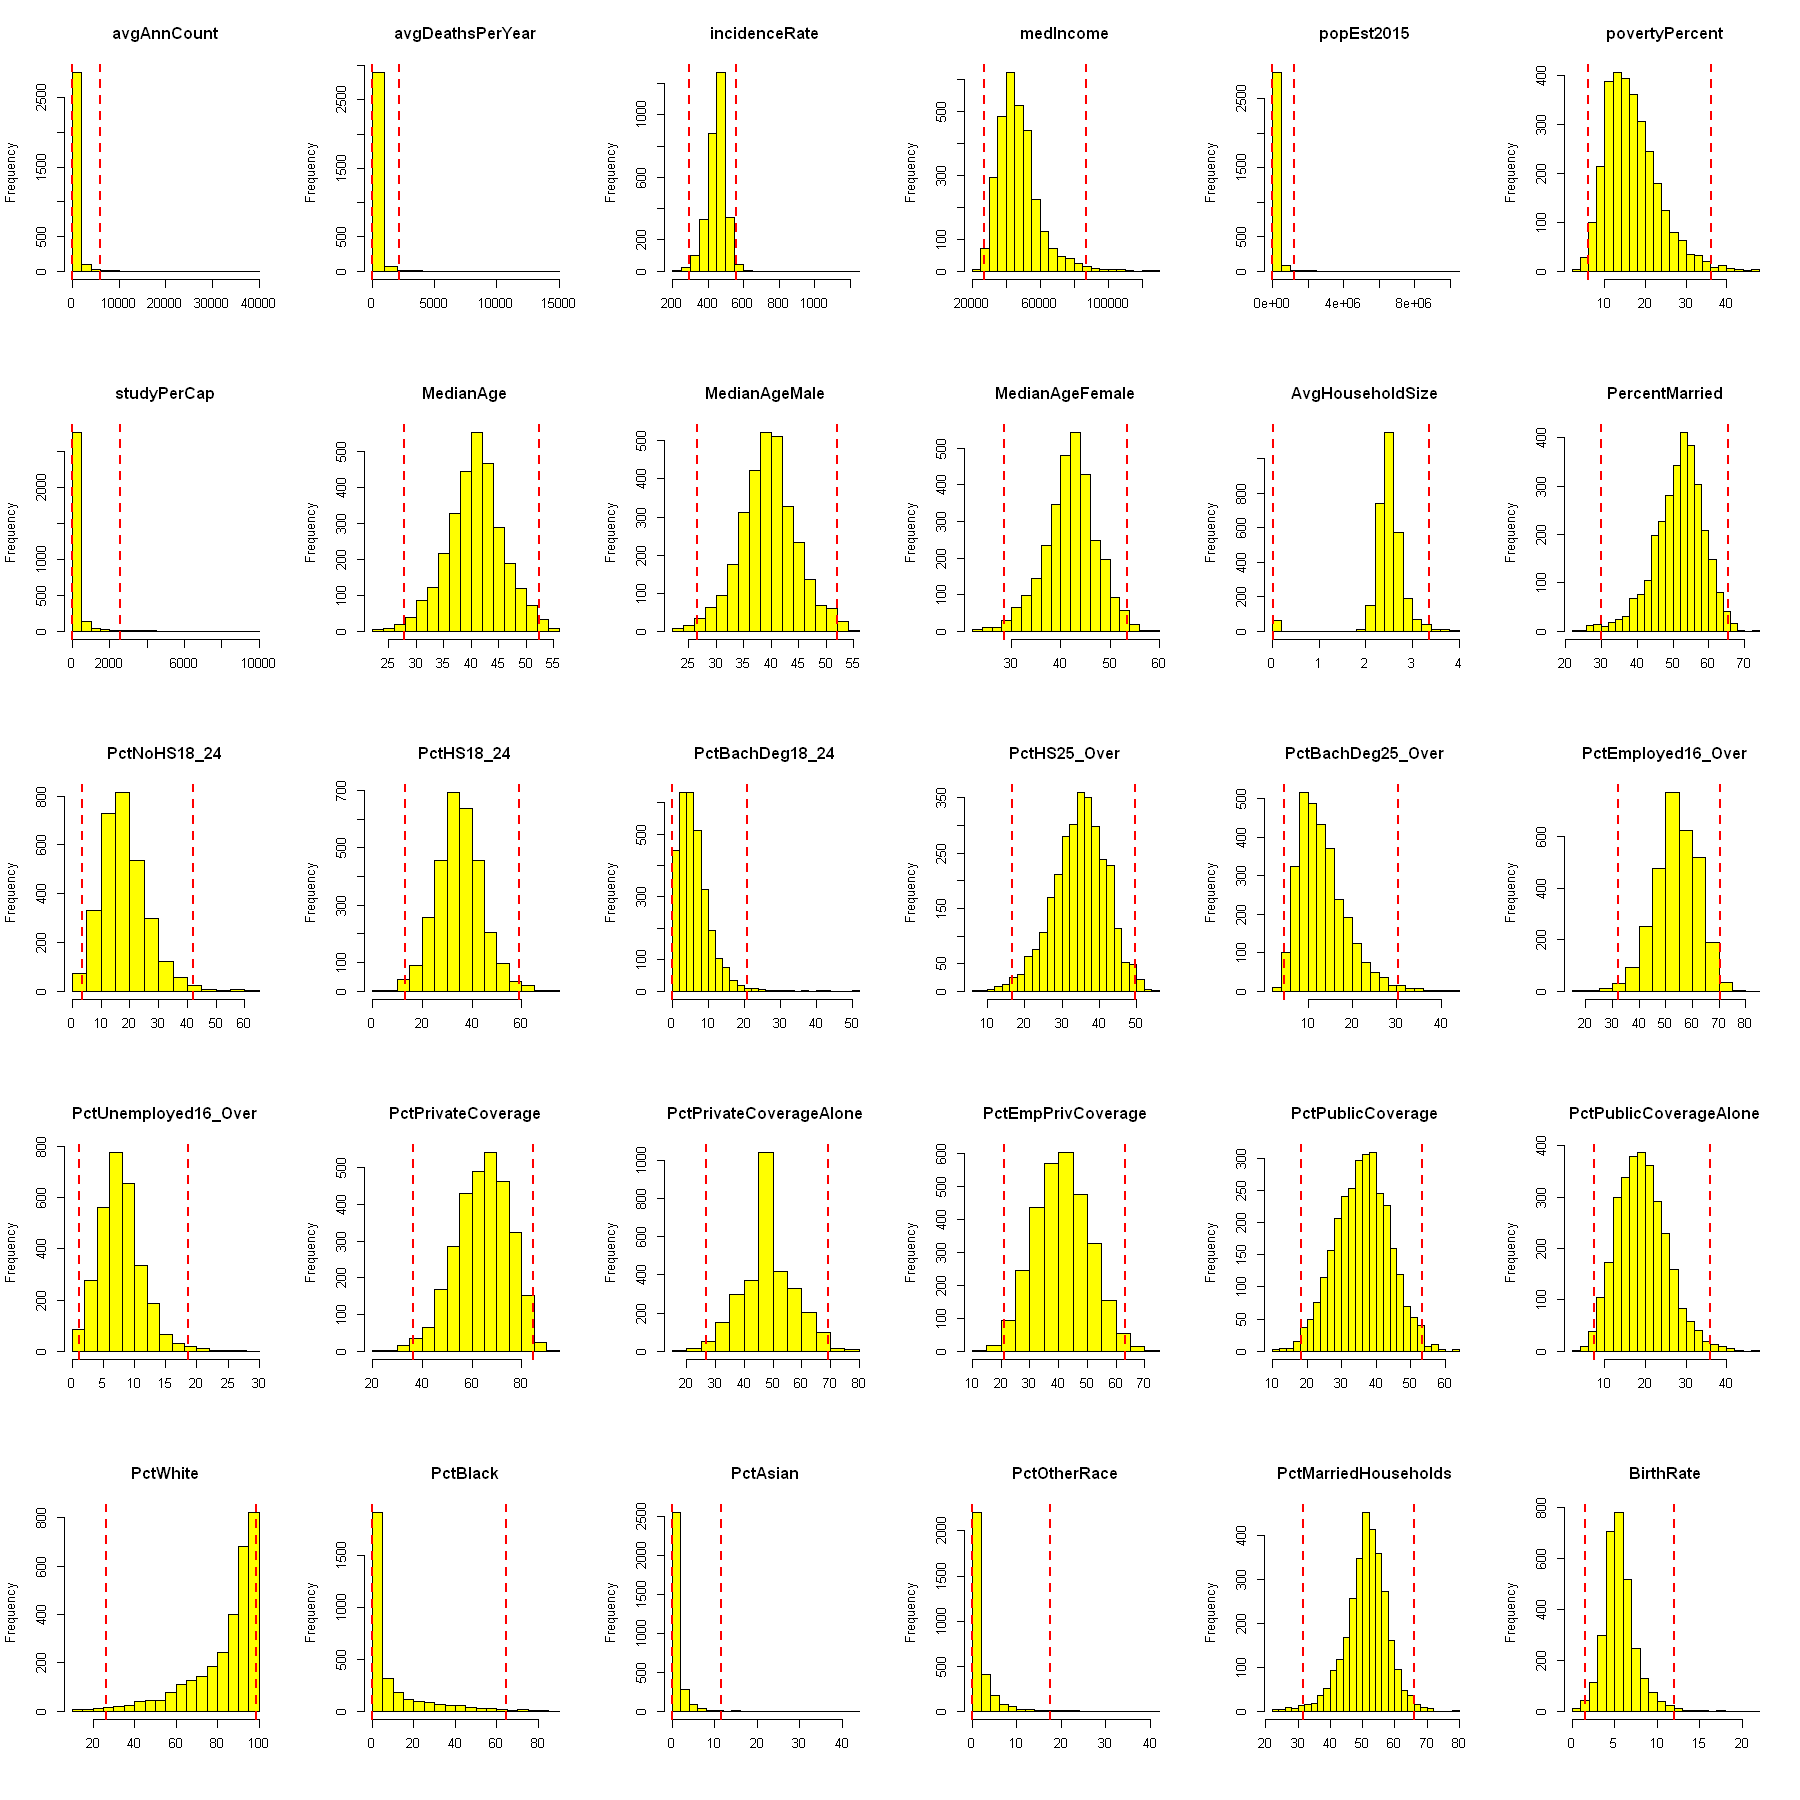

In [17]:
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow=c(5,6))
for (i in col_name) {
  hist(cancer_1[,i],main=names(cancer_1[i]),xlab="",border="black",col = "yellow",breaks = 20)
  abline(v = quantile(cancer_1[,i], probs = .99), col="red", lty=2, lwd=2)
  abline(v = quantile(cancer_1[,i], probs = .01), col="red", lty=2, lwd=2)
}

### Correlation Plot:

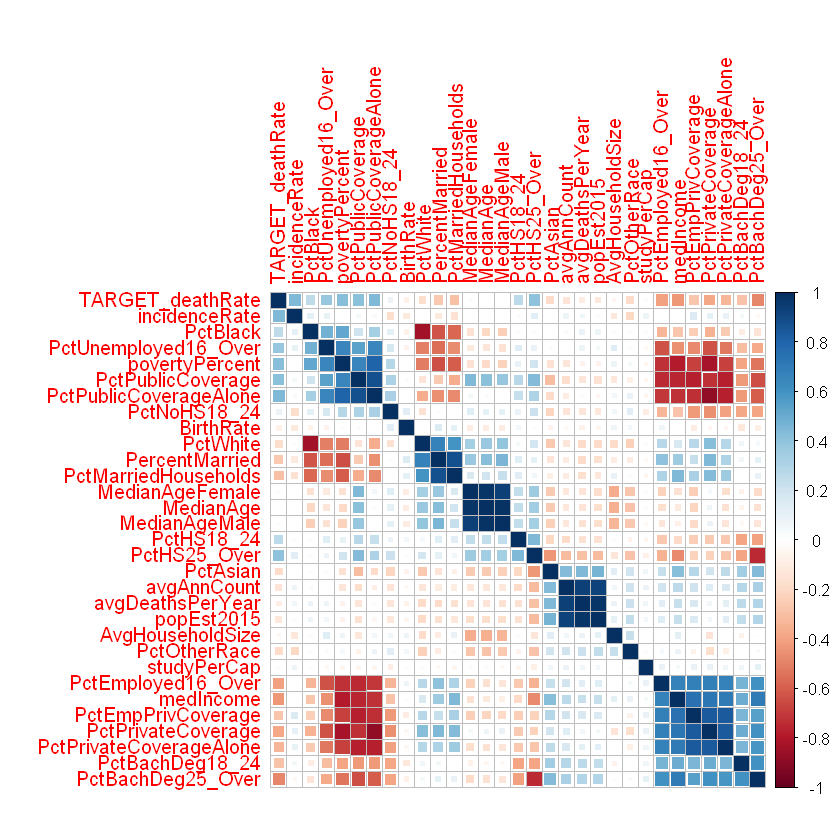

In [18]:
options(repr.plot.width = 7, repr.plot.height = 7)
CF <-cor(cancer_1)
corrplot(CF, method = "square", order = "hclust")

### Scatter plot between explanatoy variables and dependent variable:

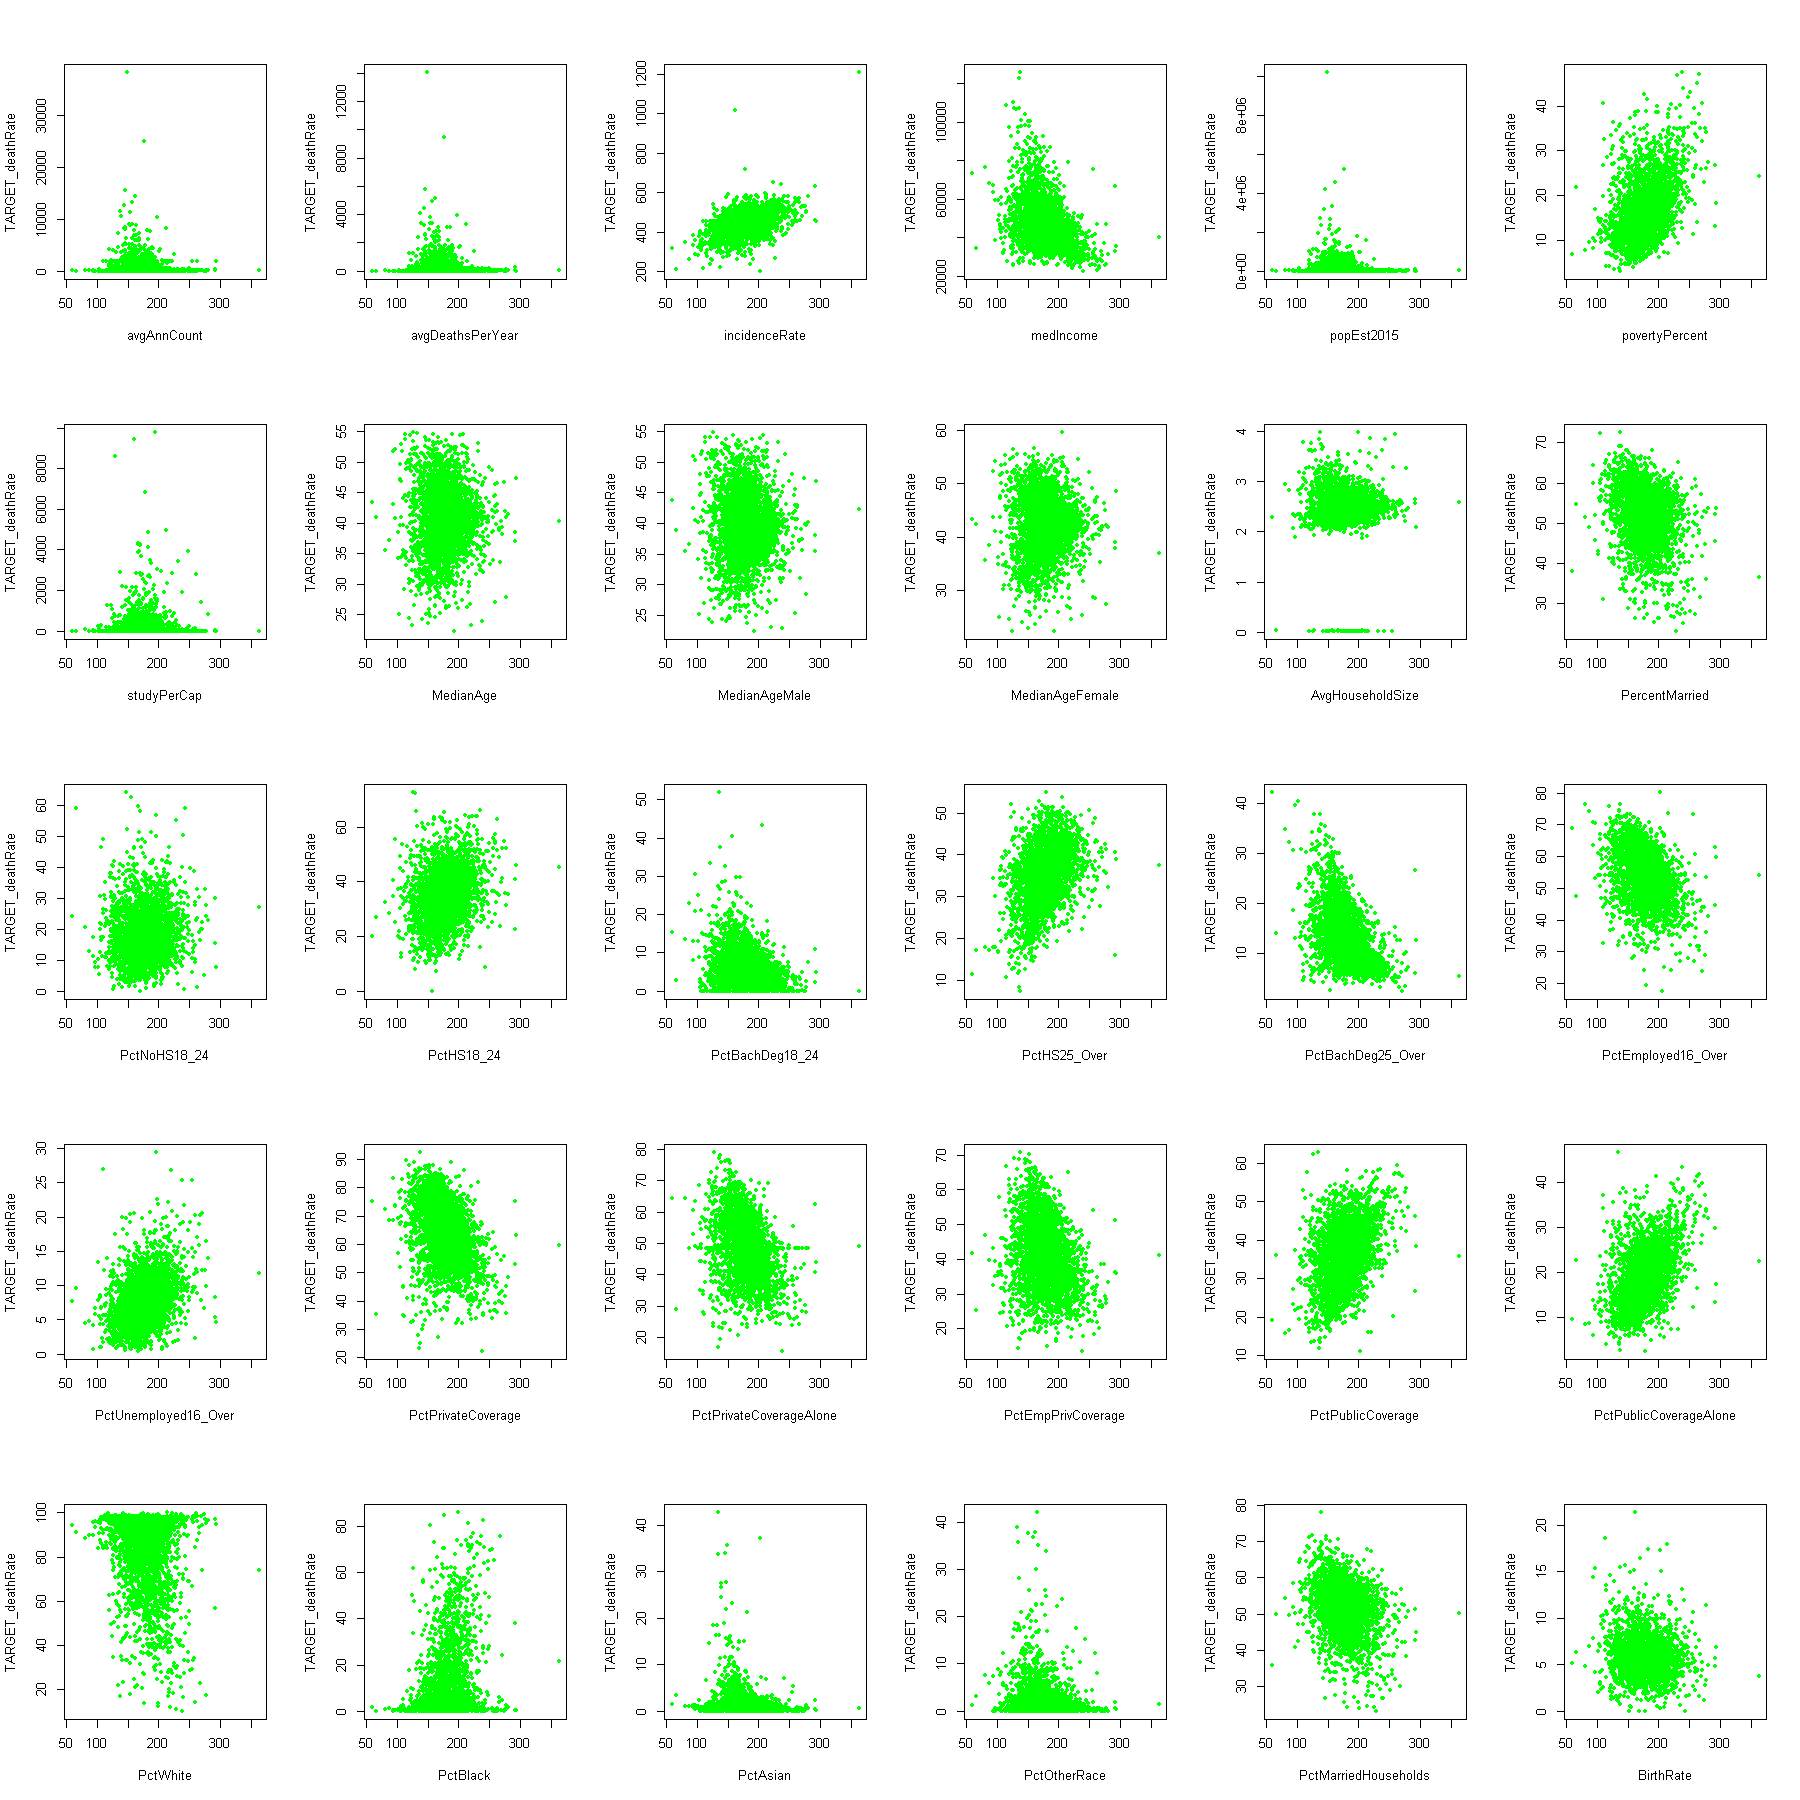

In [19]:
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow=c(5,6))
for (i in col_name) {
  plot(cancer_1[,3],cancer_1[,i],xlab = i, ylab = "TARGET_deathRate", col = "green",pch = 20)
}

# 5. MAPE, MSE and Evaluation Matrix

### In this section, we define MAPE function, MSE function and define a evaluation matrix, can help to track our results for complete analysis for differenet model which can be used for futher comparison 

## 5.1. MAPE:

### MAPE stands for Mean Absolute Percentage Error and it is defined as: 
$$ MAPE = \frac{1}{n} \sum \limits_{i=1} ^{n} |\frac{Y_i-\hat{Y_i}}{Y_i}| * 100 \% $$

In [20]:
MAPE <- function(actual,pred){
  mean(abs((actual - pred)/actual)) * 100  
}

## 5.2 Evaluation Matrix:

### Evaluation matrix initialization:

### We generally record MAPE value, R Square value, Adjusted R square value, Mean Square Error and Remarks for each type of modeling so that we can finally compare by this evaluation matrix

In [21]:
EM <- data.frame(Method = rep('a',20), MAPE = rep(0,20), R_Square = rep(0,20), Adj_R_Square = rep(0,20), MSE =rep(0,20), Remarks = rep('a',20))

In [22]:
EM$Method <- as.character(EM$Method)
EM$Remarks <- as.character(EM$Remarks)

## 5.3. MSE:

### MSE stands for Mean Square Error and it is defined as:
$$ MSE = \frac{1}{n} \sum \limits _{i=1}^{n} (Y_i-\hat{Y_i})^2 $$

In [23]:
MSE <- function(actual_value,predicted_value){
  mean((predicted_value - actual_value)^2)
}

# 6. Linear Regression

### In this section, simple linear model is performed just after processing the data and all values are recorded

### Here Multiple Linear Regression Model : 
$$ Y = X\beta + \epsilon $$
### where,
$$ Y = \begin{bmatrix}
Y_1 \\
Y_2 \\
\vdots \\
Y_n
\end{bmatrix},
\beta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_{k-1}
\end{bmatrix},
\epsilon = \begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{bmatrix}
X = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1,k-1}\\
1 & x_{21} & x_{22} & \dots & x_{2,k-1}\\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \dots & x_{n,k-1}\\
\end{bmatrix}
$$

$ Y = $ 'TARGET_deathRate'\
$ X = $ 'avgAnnCount' 'avgDeathsPerYear' 'incidenceRate' 'medIncome' 'popEst2015' 'povertyPercent' 'studyPerCap' 'MedianAge' 'MedianAgeMale' 'MedianAgeFemale' 'AvgHouseholdSize' 'PercentMarried' 'PctNoHS18_24' 'PctHS18_24' 'PctBachDeg18_24' 'PctHS25_Over' 'PctBachDeg25_Over' 'PctEmployed16_Over' 'PctUnemployed16_Over' 'PctPrivateCoverage' 'PctPrivateCoverageAlone' 'PctEmpPrivCoverage' 'PctPublicCoverage' 'PctPublicCoverageAlone' 'PctWhite' 'PctBlack' 'PctAsian' 'PctOtherRace' 'PctMarriedHouseholds' 'BirthRate' \
$ n = $ Number of observations \
$ k = $ Number of estimated parameters \

In [24]:
lm.fit = lm(TARGET_deathRate~.,data=cancer_1)
lm.predict=predict(lm.fit,cancer_1)

EM[1,1] = "Linear Regression 1"
EM[1,2] = MAPE(cancer_1$TARGET_deathRate,lm.predict)
EM[1,3] = summary(lm.fit)$r.squared
EM[1,4] = summary(lm.fit)$adj.r.squared
EM[1,5] = MSE(cancer_1$TARGET_deathRate,lm.predict)
EM[1,6] = "Regression after Data Pre-processing without dividing test and training set"
EM[1,]

Method,MAPE,R_Square,Adj_R_Square,MSE,Remarks
Linear Regression 1,8.223226,0.522945,0.5181295,367.099,Regression after Data Pre-processing without dividing test and training set


# 7. Outlier Detection

### In this section, outlier i.e. Leverage Points and Influential Observations will be identified and filtered accordingly

## 7.1. Leverage Points by Hat Values

### Hat Value is useful to find any possible leverage point in the data. It is defined as the diagonal elements of the Hat Matrix, $H=X(X'X)^{-1}X'$. Therefore, Hat Value, $h_{ii} = x_i'(X'X)^{-1}x_i$, it is the standardized measure of the distance of the i-th observation from the center of x-cooridnate. High Hat Values indicate leverage point. 
### Cut-off of the Hat Value = $2 \bar{h} = 2\frac{k}{n}$
### Therefore any observations having $h_{ii}>2\frac{k}{n}(-0.02)$ is a possible leverage point

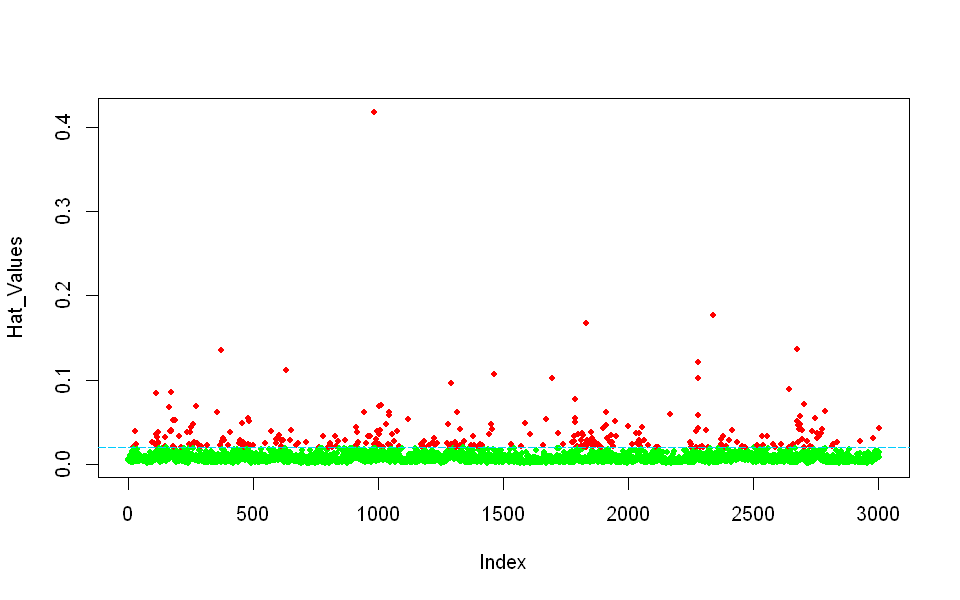

In [25]:
hv <- as.data.frame(hatvalues(lm.fit))
hatmatrix <- data.frame(Index = as.numeric(rownames(hv)), Hatvalue = hatvalues(lm.fit))
options(repr.plot.width = 8, repr.plot.height = 5)
plot(hatmatrix$Index,hatmatrix$Hatvalue,col=ifelse(hatmatrix$Hatvalue>0.02,"red","green"),xlab="Index" ,ylab= "Hat_Values",pch=20)
abline(h=0.02, col="#00CCFF", lty=5)
ind_hv <- which(hatvalues(lm.fit)>0.02)

## 7.2. Influential Observations by different methods

## 7.2.1. Influential Obeservations by Cooks Distance

### Cooks Distance helps to find influential observations in dataset. It is defined as difference between predicted response $(\hat{Y})$ obtained using all the observations and predicted response $(\hat{Y}_{(i)})$ obtained without the i-th observation. Cooks Statistic is defined as :
$$D_i = \frac{(\hat{Y}-\hat{Y}_{(i)})'(\hat{Y}-\hat{Y}_{(i)})}{kMS_{res}}$$ 
### Larger values than others indicate that observations may be highly influential. Here cutoff is set to 0.01

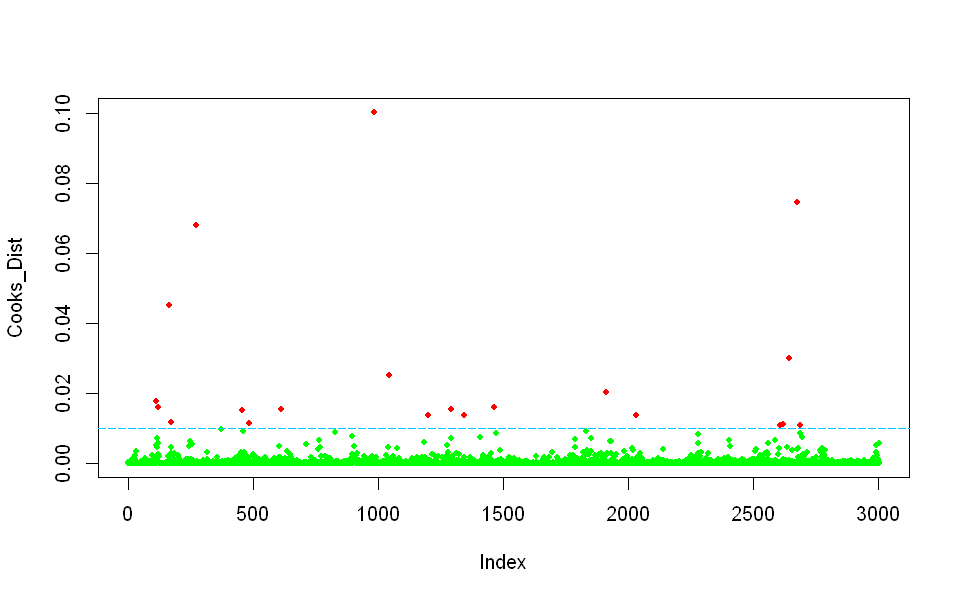

In [26]:
cd <- as.data.frame(cooks.distance(lm.fit))
cdmatrix <- data.frame(Index = as.numeric(rownames(cd)), Cooks_Dist = cooks.distance(lm.fit))
options(repr.plot.width = 8, repr.plot.height = 5)
plot(cdmatrix$Index,cdmatrix$Cooks_Dist,col=ifelse(cdmatrix$Cooks_Dist>0.01,"red","green"),xlab="Index" ,ylab= "Cooks_Dist",pch=20)
abline(h=0.01, col="#00CCFF", lty=5)
ind_cd <- which(cooks.distance(lm.fit)>0.01)

## 7.2.2. Influential Obeservations by DFFITS

### DFFITS is also useful to find influential observations. For i-th observation, DFFITS is defined as, $$DFFITS = \frac{\hat{Y_i}-\hat{Y_{(i)}}}{\sqrt{MS_{res(i)}h_{ii}}}$$
### Cutoff for influential observation : $|DFFITS_i| > 2(\frac{k}{n})^{\frac{1}{2}}(=0.2)$

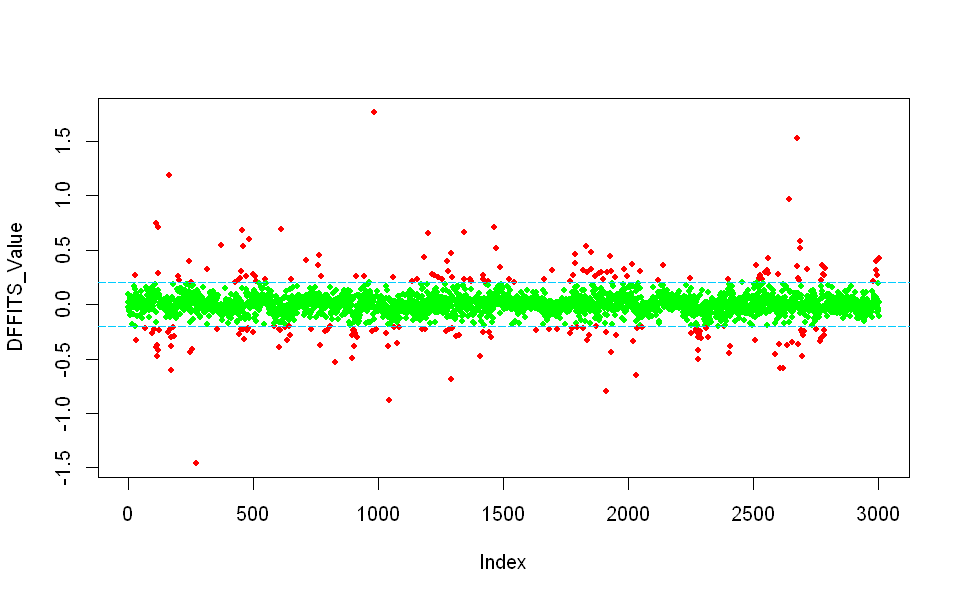

In [27]:
dff <- as.data.frame(dffits(lm.fit))
dffmatrix <- data.frame(Index = as.numeric(rownames(dff)), DFFITS_Value = dffits(lm.fit))
options(repr.plot.width = 8, repr.plot.height = 5)
plot(dffmatrix$Index,dffmatrix$DFFITS_Value,col=ifelse(dffmatrix$DFFITS_Value > 0.2 | dffmatrix$DFFITS_Value < -0.2,"red","green"),xlab="Index" ,ylab= "DFFITS_Value",pch=20)
abline(h=0.2, col="#00CCFF", lty=5)
abline(h=-0.2, col="#00CCFF", lty=5)
ind_dff <- which(dffits(lm.fit)>0.2 | dffits(lm.fit)< -0.2)

## 7.2.3. Influential Obeservations by Studentized Residual Values

### Another important statistic to find influential observation is Studentized Residuals, defined as, $r_i = \frac{e_i}{\sqrt{MS_{res}(1-h_{ii})}}$. Cutoff is set to $ |r_i| > 3$

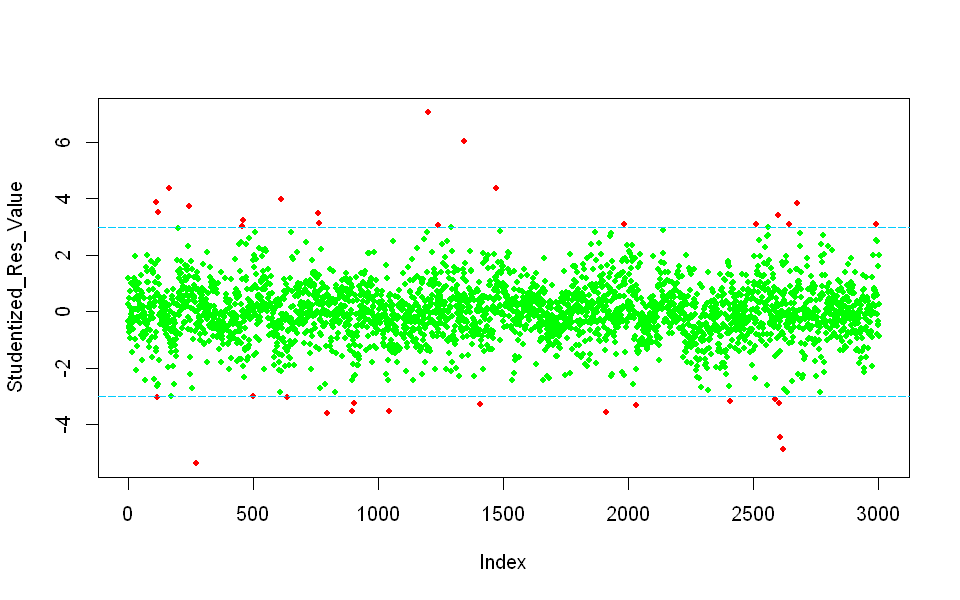

In [28]:
sr <- as.data.frame(rstudent(lm.fit))
srmatrix <- data.frame(Index = as.numeric(rownames(sr)), Studentized_Res_Value = rstudent(lm.fit))
options(repr.plot.width = 8, repr.plot.height = 5)
plot(srmatrix$Index,srmatrix$Studentized_Res_Value,col=ifelse(srmatrix$Studentized_Res_Value > 3 | srmatrix$Studentized_Res_Value < -3,"red","green"),xlab="Index" ,ylab= "Studentized_Res_Value",pch=20)
abline(h=3, col="#00CCFF", lty=5)
abline(h=-3, col="#00CCFF", lty=5)
ind_sr <- which(rstudent(lm.fit)>3 | rstudent(lm.fit)< -3)


## 7.2.4. Influential Obeservations by Covariance Ratio

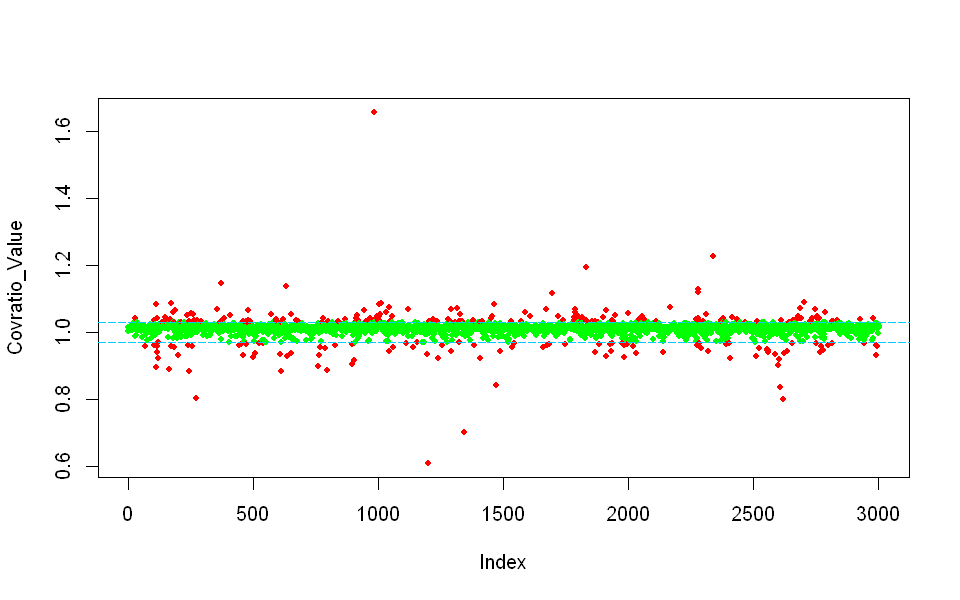

In [29]:
cv <- as.data.frame(covratio(lm.fit))
cvmatrix <- data.frame(Index = as.numeric(rownames(cv)), Covratio_Value = covratio(lm.fit))
options(repr.plot.width = 8, repr.plot.height = 5)
plot(cvmatrix$Index,cvmatrix$Covratio_Value,col=ifelse(cvmatrix$Covratio_Value-1 > 0.03 | cvmatrix$Covratio_Value-1 < -0.03,"red","green"),xlab="Index" ,ylab= "Covratio_Value",pch=20)
abline(h=1.03, col="#00CCFF", lty=5)
abline(h=0.97, col="#00CCFF", lty=5)
ind_cv <- which(cvmatrix$Covratio_Value-1 > 0.03 | cvmatrix$Covratio_Value-1 < -0.03)

### Now union of all of the points which are on the outside of the cutoff values of the different method should be discarded as Leverage and Influential Points. By this logic we finally get 427 observations which should be discarded.

In [30]:
drop_index <- union(ind_hv,union(ind_cd,union(ind_dff,union(ind_sr,ind_cv))))
print(length(drop_index))
cancer_new <- cancer_1[-drop_index,]

[1] 427


## 7.3. Regression after removing all Leverage Points and Influential Observations

### Results of Linear Regression improved substaintially but still there is no training and test set which will be considered in the next part.

In [31]:
lm.fit1 = lm(TARGET_deathRate~.,data=cancer_new)
lm.predict1=predict(lm.fit1,cancer_new)

EM[2,1] = "Linear Regression 2"
EM[2,2] = MAPE(cancer_new$TARGET_deathRate, lm.predict1)
EM[2,3] = summary(lm.fit1)$r.squared
EM[2,4] = summary(lm.fit1)$adj.r.squared
EM[2,5] = MSE(cancer_new$TARGET_deathRate,lm.predict1)
EM[2,6] = "Regression after Cleaning Leverage and Outliers but without dividing test and training set"
EM[1:2,]

Method,MAPE,R_Square,Adj_R_Square,MSE,Remarks
Linear Regression 1,8.223226,0.5229450,0.5181295,367.0990,Regression after Data Pre-processing without dividing test and training set
Linear Regression 2,6.522762,0.6231021,0.6186593,210.2266,Regression after Cleaning Leverage and Outliers but without dividing test and training set


### Following plots of studentized residuals and hat values are less scattered in the later case which is a indication of no leverage and no influential points.

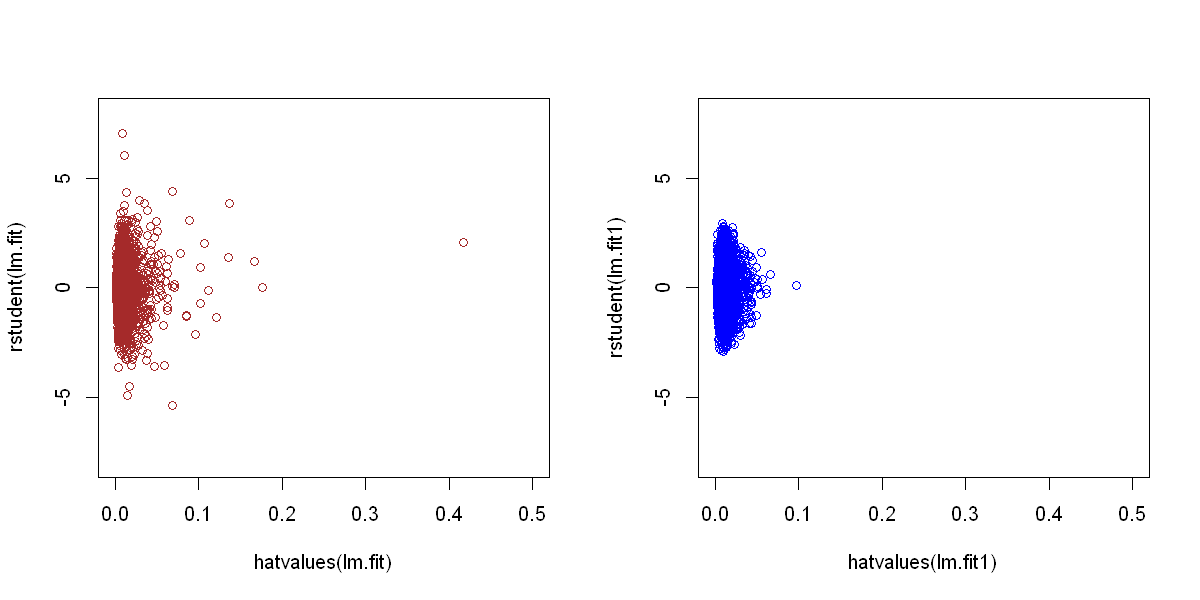

In [32]:
options(repr.plot.width = 10, repr.plot.height = 5)
par(mfrow=c(1,2))
plot(hatvalues(lm.fit),rstudent(lm.fit),xlim = c(0,0.5),ylim = c(-8,8),col="brown")
plot(hatvalues(lm.fit1),rstudent(lm.fit1),xlim = c(0,0.5),ylim = c(-8,8),col='blue')

# 8. Test-train Spiliting

### Now we can divide the observations in to the test and training set for further evaluation

In [33]:
set.seed(4)
smp_size <- floor(0.80 * nrow(cancer_new))
train <- sample(seq_len(nrow(cancer_new)), size = smp_size)

cancer_train <- cancer_new[train, ]
cancer_test <- cancer_new[-train, ]

### This is the first linear regression model after spiliting the observations into the test and training set

In [34]:
lm.fit2 = lm(TARGET_deathRate~.,data=cancer_train)
lm.predict2=predict(lm.fit2,cancer_test)

EM[3,1] = "Linear Regression 3"
EM[3,2] = MAPE(cancer_test$TARGET_deathRate , lm.predict2)
EM[3,3] = summary(lm.fit2)$r.squared
EM[3,4] = summary(lm.fit2)$adj.r.squared
EM[3,5] = MSE(cancer_test$TARGET_deathRate,lm.predict2)
EM[3,6] = "Regression after dividing test and training set"
EM[1:3,]

Method,MAPE,R_Square,Adj_R_Square,MSE,Remarks
Linear Regression 1,8.223226,0.5229450,0.5181295,367.0990,Regression after Data Pre-processing without dividing test and training set
Linear Regression 2,6.522762,0.6231021,0.6186593,210.2266,Regression after Cleaning Leverage and Outliers but without dividing test and training set
Linear Regression 3,6.359571,0.6164169,0.6107454,196.3689,Regression after dividing test and training set


# 9. Assumptions checking

## 9.1. Normality of  $ E(Y|X) $

### Since error term follows normal distribution so expected value of $Y$ should follow normal distribution. If expected value of $Y$ does not follow normal distribution then "bocox" command helps to find ($\lambda$) which transformation is needed by maximizing Log-Likelihood value. Transformation is as follow:
$Y_i'  = $
    \begin{cases}
      \log(Y_i) & \text{if $\lambda=0$};  \\
      (Y_i^\lambda-1)/\lambda & \text{otherwise}.
    \end{cases}

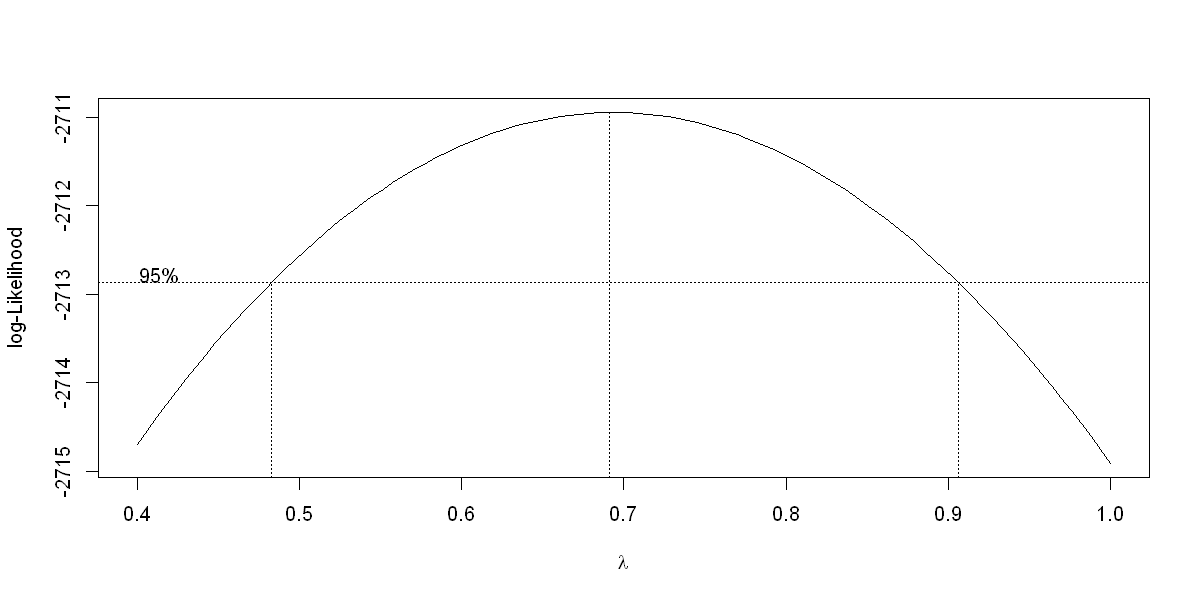

In [35]:
boxcox(lm.fit2,lambda = seq(0.4, 1, by = 0.1))

### By this method we get approximate value of $\lambda=0.7$ and by taking this value following transformation will be done.

In [36]:
cancer_train$TARGET_deathRate <-(((cancer_train$TARGET_deathRate ^ 0.7) - 1) / 0.7)
cancer_test$TARGET_deathRate <-(((cancer_test$TARGET_deathRate ^ 0.7) - 1) / 0.7)

### Here is the histogram of previous and transformed expected value of $Y$ and transformed histogram more or less follows normal distribution

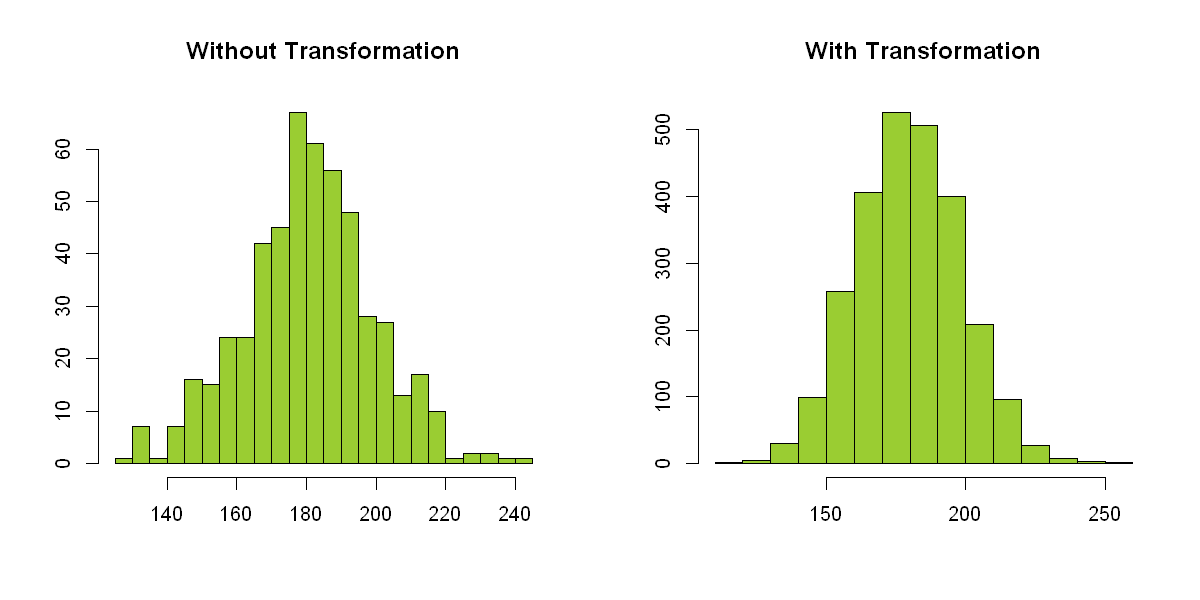

In [37]:
options(repr.plot.width = 10, repr.plot.height = 5)
par(mfrow=c(1,2))
hist(lm.predict2,xlab="",ylab="",col="olivedrab3",main="Without Transformation",breaks = 20)
hist((0.7*predict(lm(TARGET_deathRate~.,data=rbind(cancer_train, cancer_test)),rbind(cancer_train, cancer_test))+1)^(1/0.7),xlab="",ylab="",col="olivedrab3",main="With Transformation", breaks=20)

### Some other plots to confirm Normality

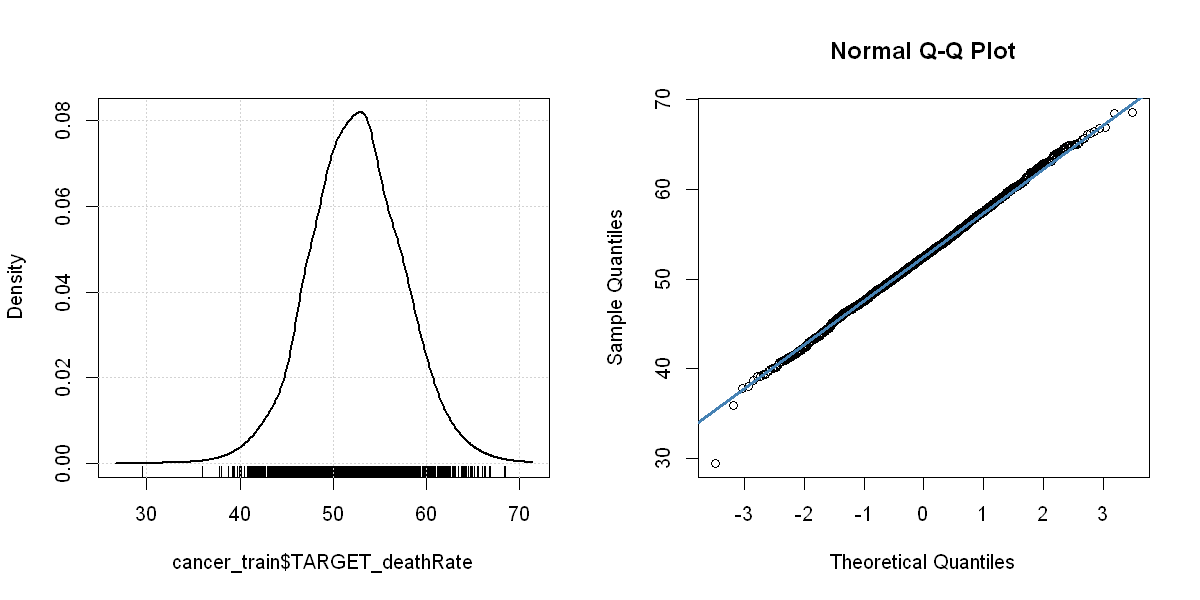

In [38]:
options(repr.plot.width = 10, repr.plot.height = 5)
par(mfrow=c(1,2))
densityPlot(cancer_train$TARGET_deathRate)
qqnorm(cancer_train$TARGET_deathRate, pch = 1, frame = TRUE)
qqline(cancer_train$TARGET_deathRate, col = "steelblue", lwd = 3)

### JB test stat is also satisfied, therefore we accept the null hypothesis of normality of error terms

In [39]:
jarque.test(residuals(lm(TARGET_deathRate~.,data=rbind(cancer_train, cancer_test))))


	Jarque-Bera Normality Test

data:  residuals(lm(TARGET_deathRate ~ ., data = rbind(cancer_train,     cancer_test)))
JB = 0.48562, p-value = 0.7844
alternative hypothesis: greater


## 9.2. Multicollinearity Diagnostics

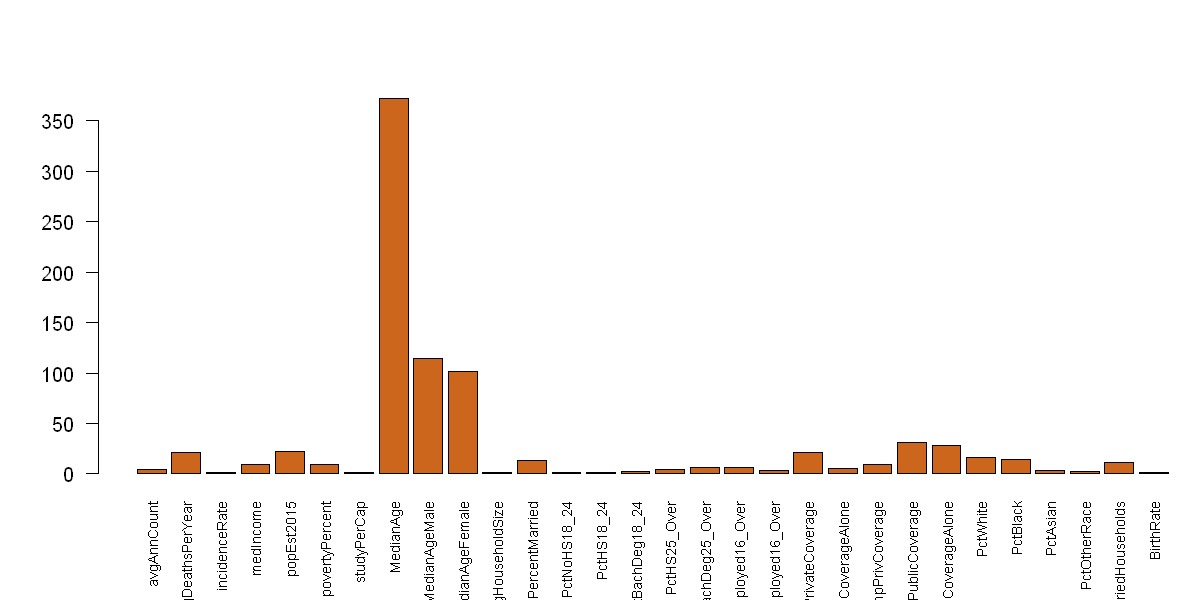

In [40]:
VIF = vif(lm.fit2)
VIF_Table <- data.frame(Variables = names(VIF), VIF = vif(lm.fit2))
VIF_Table <- data.frame(Variables = VIF_Table$Variables, VIF = VIF_Table$VIF)
barplot(height = VIF_Table$VIF,names= VIF_Table$Variables,xlim=c(1,170),cex.names = 0.7,las=2,width = 5,col="chocolate3")

###  By the value of the VIF variables with high value of VIF will be removed to check the problem of multicollinearity

In [41]:
drop_mul <-  c("avgDeathsPerYear",
               "MedianAge",
               "MedianAgeMale",
               "MedianAgeFemale",
               "popEst2015",
               "medIncome",
               "studyPerCap",
               "AvgHouseholdSize",
               "PctBachDeg18_24",
               "PctPrivateCoverageAlone",
               "PctAsian",
               "PctPublicCoverageAlone")
cancer_train_1 <- cancer_train %>% select(-drop_mul)
cancer_test_1 <- cancer_test %>% select(-drop_mul)

## 9.3. Heteroscedasticity checking

### There are no patterns in the residuals plot so there are no heteroscedasticity and also BP test proves this result.

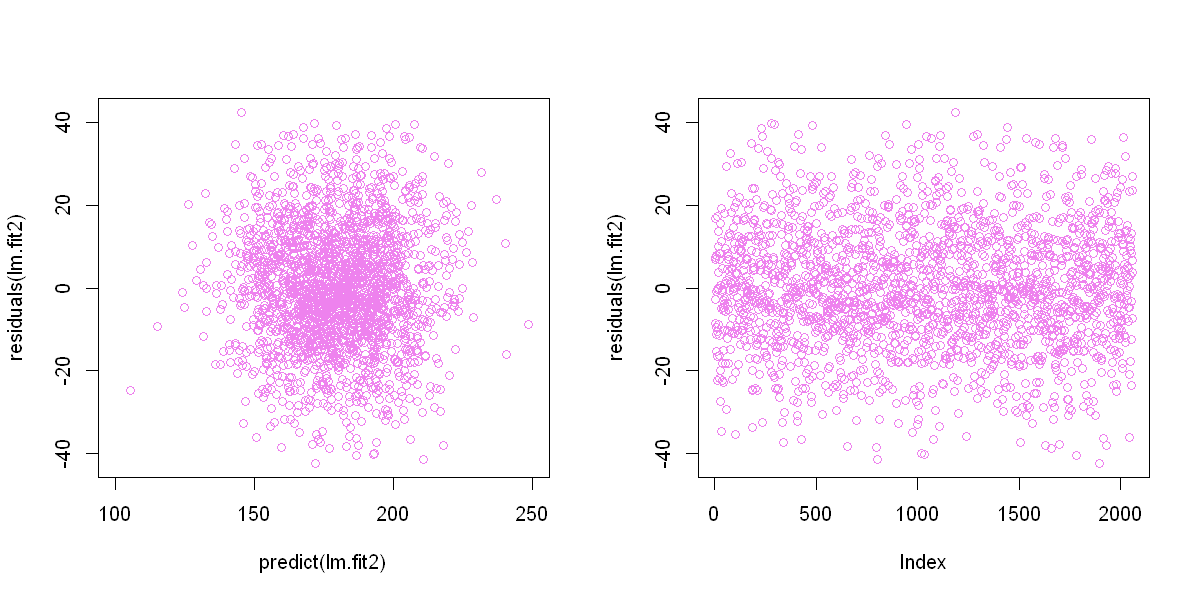

In [42]:
options(repr.plot.width = 10, repr.plot.height = 5)
par(mfrow=c(1,2))
plot(predict(lm.fit2), residuals(lm.fit2),col="violet",xlim = c(100,250))
plot(residuals(lm.fit2),col="violet")

In [43]:
bptest(lm.fit2)


	studentized Breusch-Pagan test

data:  lm.fit2
BP = 133.45, df = 30, p-value = 5.274e-15


# 10. Linear model after modification

In [44]:
lm.fit3 = lm(TARGET_deathRate~.,data=cancer_train_1)
lm.predict3=predict(lm.fit3,cancer_test_1)

EM[4,1] = "Linear Regression 4"
EM[4,2] = MAPE(cancer_test_1$TARGET_deathRate , lm.predict3)
EM[4,3] = summary(lm.fit3)$r.squared
EM[4,4] = summary(lm.fit3)$adj.r.squared
EM[4,5] = MSE(cancer_test_1$TARGET_deathRate,lm.predict3)
EM[4,6] = "Regression after assumptions checking"
EM[1:4,]

Method,MAPE,R_Square,Adj_R_Square,MSE,Remarks
Linear Regression 1,8.223226,0.5229450,0.5181295,367.098958,Regression after Data Pre-processing without dividing test and training set
Linear Regression 2,6.522762,0.6231021,0.6186593,210.226606,Regression after Cleaning Leverage and Outliers but without dividing test and training set
Linear Regression 3,6.359571,0.6164169,0.6107454,196.368942,Regression after dividing test and training set
Linear Regression 4,4.561192,0.6036058,0.6001100,8.817407,Regression after assumptions checking


# 11. Subset Selection

### This selection method is working based on fitting separate least squares regression for each possible combination of the all possible predictors.

In [45]:
regit.full = regsubsets(TARGET_deathRate~.,cancer_train,nvmax = 30)
reg.summary=summary(regit.full)

### By looking at the value of Cp, BIC, R Square, and Adjusted R Square, for 23 variables Adjusted R Square is maximized and Cp is minimized.

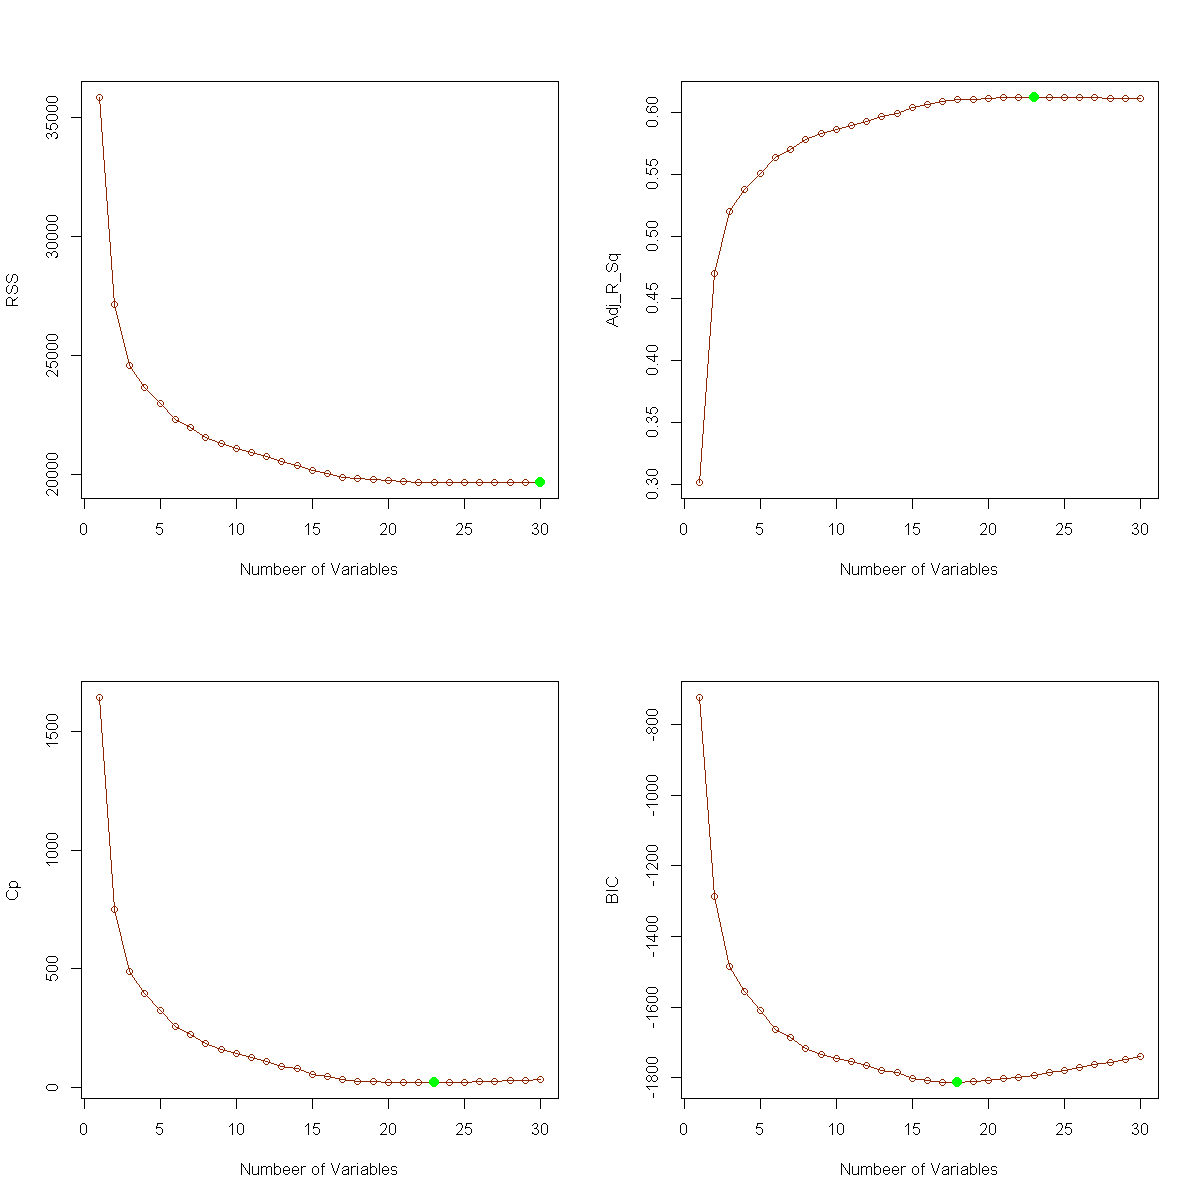

In [46]:
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow=c(2,2))

plot(reg.summary$rss, xlab="Numbeer of Variables", ylab = "RSS", type = "o",col="orangered4")
points(which.min(reg.summary$rss), reg.summary$rss[which.min(reg.summary$rss)], col="green", cex=2, pch=20)

plot(reg.summary$adjr2, xlab="Numbeer of Variables", ylab = "Adj_R_Sq", type = "o",col="orangered4")
points(which.max(reg.summary$adjr2), reg.summary$adjr2[which.max(reg.summary$adjr2)], col="green", cex=2, pch=20)

plot(reg.summary$cp, xlab="Numbeer of Variables", ylab = "Cp", type = "o",col="orangered4")
points(which.min(reg.summary$cp), reg.summary$cp[which.min(reg.summary$cp)], col="green", cex=2, pch=20)

plot(reg.summary$bic, xlab="Numbeer of Variables", ylab = "BIC", type = "o",col="orangered4")
points(which.min(reg.summary$bic), reg.summary$bic[which.min(reg.summary$bic)], col="green", cex=2, pch=20)

### 23 is the optimum number of variables which can be considered for further modeling.

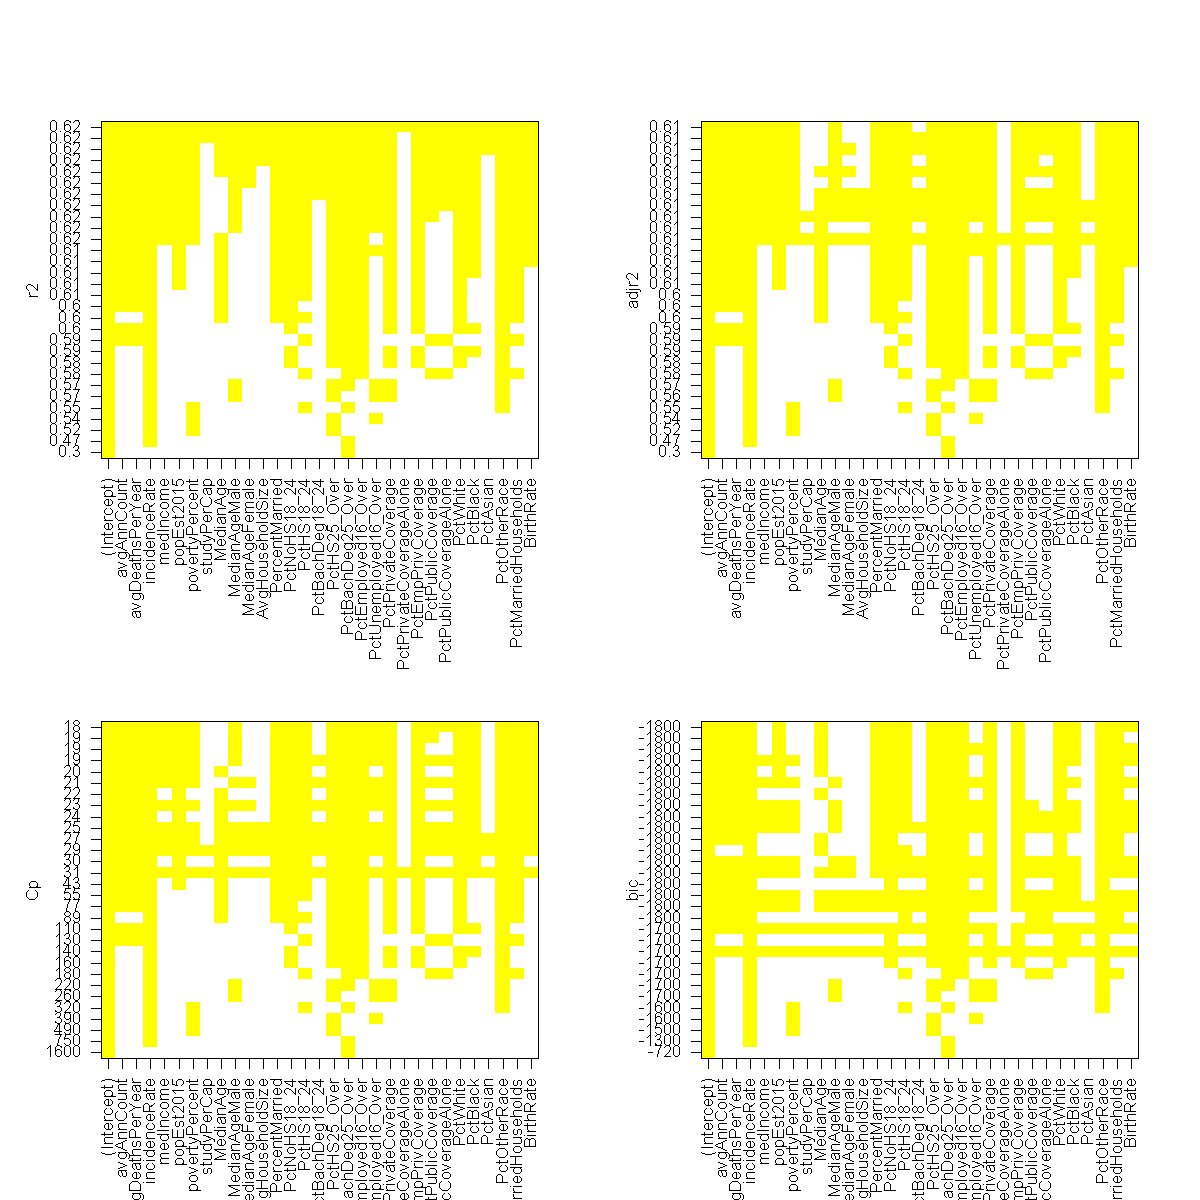

In [47]:
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow=c(2,2))
plot(regit.full,scale = "r2",col="yellow")
plot(regit.full,scale = "adjr2",col="yellow")
plot(regit.full,scale = "Cp",col="yellow")
plot(regit.full,scale = "bic",col="yellow")

In [48]:
coeff_23 <- names(coef(regit.full,23))
print(coeff_23)

 [1] "(Intercept)"            "avgAnnCount"            "avgDeathsPerYear"      
 [4] "incidenceRate"          "medIncome"              "popEst2015"            
 [7] "povertyPercent"         "MedianAgeMale"          "PercentMarried"        
[10] "PctNoHS18_24"           "PctHS18_24"             "PctHS25_Over"          
[13] "PctBachDeg25_Over"      "PctEmployed16_Over"     "PctUnemployed16_Over"  
[16] "PctPrivateCoverage"     "PctEmpPrivCoverage"     "PctPublicCoverage"     
[19] "PctPublicCoverageAlone" "PctWhite"               "PctBlack"              
[22] "PctOtherRace"           "PctMarriedHouseholds"   "BirthRate"             


In [49]:
coeff_23[1] <- "TARGET_deathRate"

lm.fit4 = lm(TARGET_deathRate~.,data=cancer_train[,coeff_23])
lm.predict4=predict(lm.fit4,cancer_test)

EM[5,1] = "Linear Regression 5"
EM[5,2] = MAPE(cancer_test$TARGET_deathRate, lm.predict4)
EM[5,3] = summary(lm.fit4)$r.squared
EM[5,4] = summary(lm.fit4)$adj.r.squared
EM[5,5] = MSE(cancer_test$TARGET_deathRate,lm.predict4)
EM[5,6] = "Regression with Subset Selection"
EM[1:5,]

Method,MAPE,R_Square,Adj_R_Square,MSE,Remarks
Linear Regression 1,8.223226,0.5229450,0.5181295,367.098958,Regression after Data Pre-processing without dividing test and training set
Linear Regression 2,6.522762,0.6231021,0.6186593,210.226606,Regression after Cleaning Leverage and Outliers but without dividing test and training set
Linear Regression 3,6.359571,0.6164169,0.6107454,196.368942,Regression after dividing test and training set
Linear Regression 4,4.561192,0.6036058,0.6001100,8.817407,Regression after assumptions checking
Linear Regression 5,4.551824,0.6168652,0.6125371,8.720604,Regression with Subset Selection


# 12. Forward Selection

### This selection method is working based on fitting separate least squares regression not for each possible combination rather it begins with a model containing no predictors and then adds predictors to the model, one at a time, until all of the predictors are in the model.

In [50]:
regit.fwd = regsubsets(TARGET_deathRate~.,cancer_train,nvmax = 30,method = "forward")
reg.summary.fwd=summary(regit.fwd)

### By looking at the value of Cp, BIC, R Square, and Adjusted R Square, for 23 variables Adjusted R Square is maximized and Cp is minimized and for 20 variables BIC is minimized.
### Both situation will be considered in further modeling.

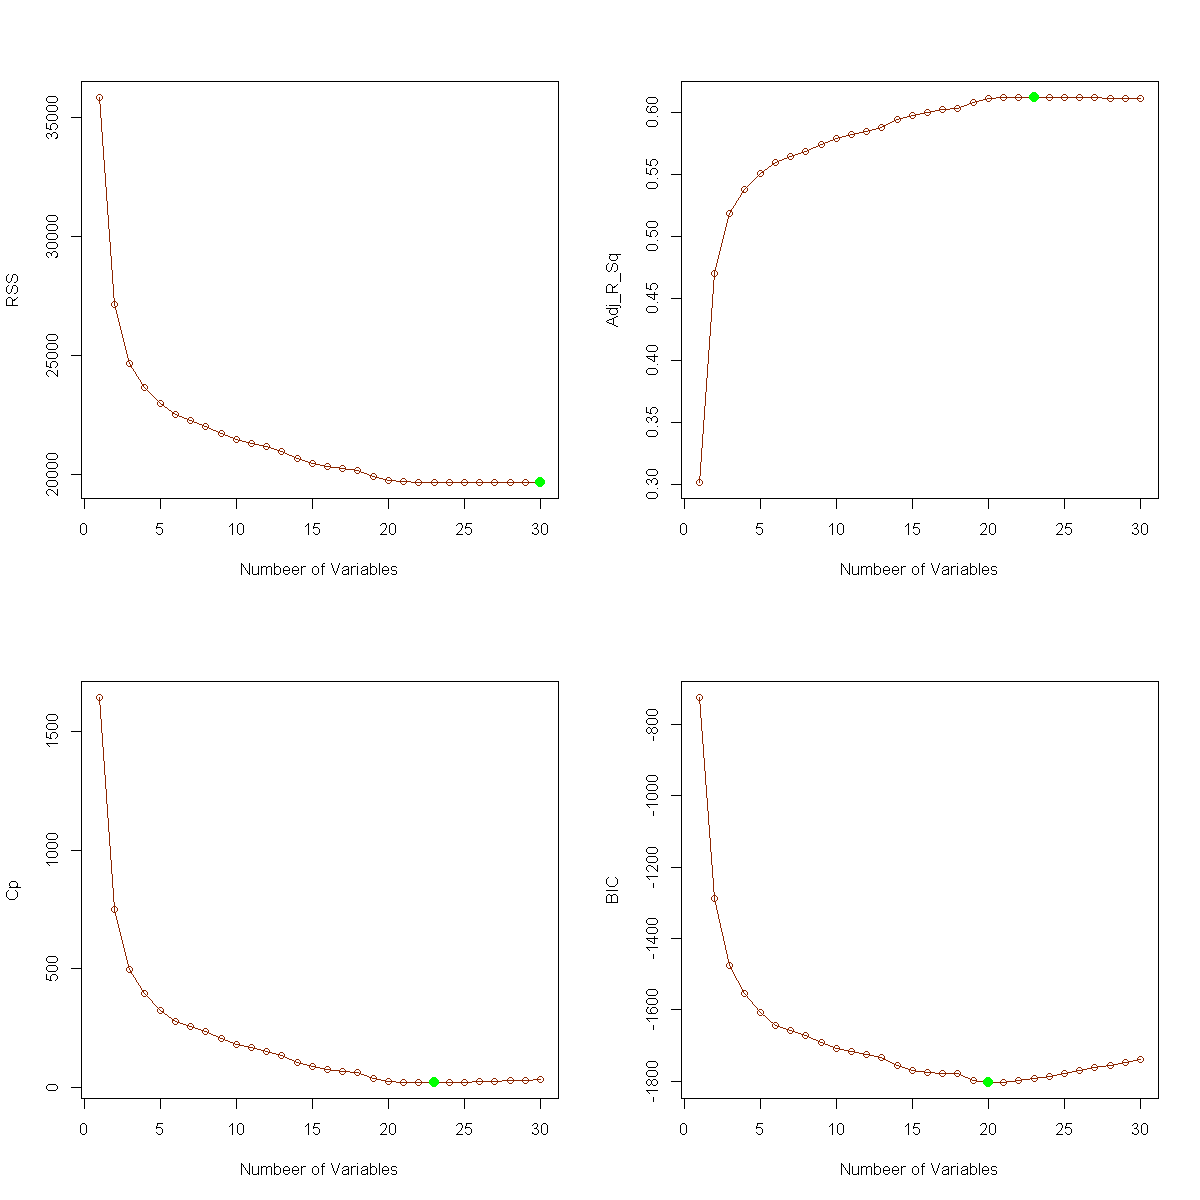

In [51]:
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow=c(2,2))

plot(reg.summary.fwd$rss, xlab="Numbeer of Variables", ylab = "RSS", type = "o",col="orangered4")
points(which.min(reg.summary.fwd$rss),reg.summary.fwd$rss[which.min(reg.summary.fwd$rss)],col="green", cex=2, pch=20)

plot(reg.summary.fwd$adjr2, xlab="Numbeer of Variables", ylab = "Adj_R_Sq", type = "o",col="orangered4")
points(which.max(reg.summary.fwd$adjr2),reg.summary.fwd$adjr2[which.max(reg.summary.fwd$adjr2)],col="green", cex=2, pch=20)

plot(reg.summary.fwd$cp, xlab="Numbeer of Variables", ylab = "Cp", type = "o",col="orangered4")
points(which.min(reg.summary.fwd$cp),reg.summary.fwd$cp[which.min(reg.summary.fwd$cp)],col="green", cex=2, pch=20)

plot(reg.summary.fwd$bic, xlab="Numbeer of Variables", ylab = "BIC", type = "o",col="orangered4")
points(which.min(reg.summary.fwd$bic),reg.summary.fwd$bic[which.min(reg.summary.fwd$bic)],col="green", cex=2, pch=20)

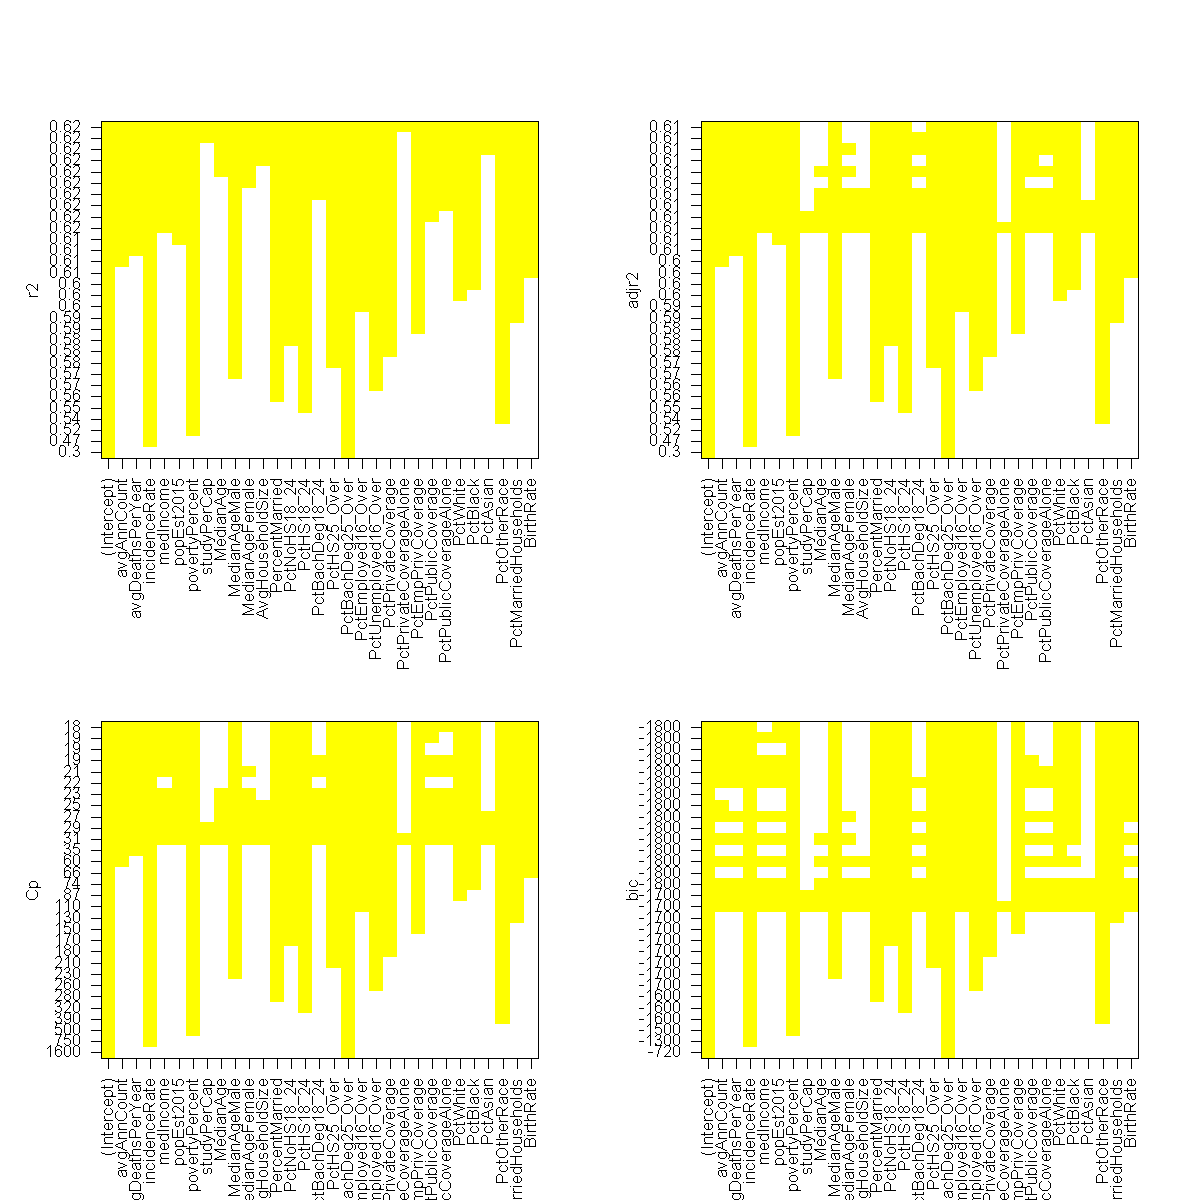

In [52]:
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow=c(2,2))
plot(regit.fwd,scale = "r2",col="yellow")
plot(regit.fwd,scale = "adjr2",col="yellow")
plot(regit.fwd,scale = "Cp",col="yellow")
plot(regit.fwd,scale = "bic",col="yellow")

In [53]:
coeff_23_for <- names(coef(regit.fwd,23))
print(coeff_23_for)

 [1] "(Intercept)"            "avgAnnCount"            "avgDeathsPerYear"      
 [4] "incidenceRate"          "medIncome"              "popEst2015"            
 [7] "povertyPercent"         "MedianAgeMale"          "PercentMarried"        
[10] "PctNoHS18_24"           "PctHS18_24"             "PctHS25_Over"          
[13] "PctBachDeg25_Over"      "PctEmployed16_Over"     "PctUnemployed16_Over"  
[16] "PctPrivateCoverage"     "PctEmpPrivCoverage"     "PctPublicCoverage"     
[19] "PctPublicCoverageAlone" "PctWhite"               "PctBlack"              
[22] "PctOtherRace"           "PctMarriedHouseholds"   "BirthRate"             


In [54]:
coeff_23_for[1] <- "TARGET_deathRate"

lm.fit5 = lm(TARGET_deathRate~.,data=cancer_train[,coeff_23_for])
lm.predict5=predict(lm.fit5,cancer_test)

EM[6,1] = "Linear Regression 6"
EM[6,2] = MAPE(cancer_test$TARGET_deathRate, lm.predict5)
EM[6,3] = summary(lm.fit5)$r.squared
EM[6,4] = summary(lm.fit5)$adj.r.squared
EM[6,5] = MSE(cancer_test$TARGET_deathRate,lm.predict5)
EM[6,6] = "Regression with Forward Selection, 23 variables"
EM[1:6,]

Method,MAPE,R_Square,Adj_R_Square,MSE,Remarks
Linear Regression 1,8.223226,0.5229450,0.5181295,367.098958,Regression after Data Pre-processing without dividing test and training set
Linear Regression 2,6.522762,0.6231021,0.6186593,210.226606,Regression after Cleaning Leverage and Outliers but without dividing test and training set
Linear Regression 3,6.359571,0.6164169,0.6107454,196.368942,Regression after dividing test and training set
Linear Regression 4,4.561192,0.6036058,0.6001100,8.817407,Regression after assumptions checking
Linear Regression 5,4.551824,0.6168652,0.6125371,8.720604,Regression with Subset Selection
Linear Regression 6,4.551824,0.6168652,0.6125371,8.720604,"Regression with Forward Selection, 23 variables"


In [55]:
coeff_20_for <- names(coef(regit.fwd,20))
print(coeff_20_for)

 [1] "(Intercept)"          "avgAnnCount"          "avgDeathsPerYear"    
 [4] "incidenceRate"        "popEst2015"           "povertyPercent"      
 [7] "MedianAgeMale"        "PercentMarried"       "PctNoHS18_24"        
[10] "PctHS18_24"           "PctHS25_Over"         "PctBachDeg25_Over"   
[13] "PctEmployed16_Over"   "PctUnemployed16_Over" "PctPrivateCoverage"  
[16] "PctEmpPrivCoverage"   "PctWhite"             "PctBlack"            
[19] "PctOtherRace"         "PctMarriedHouseholds" "BirthRate"           


In [56]:
coeff_20_for[1] <- "TARGET_deathRate"

lm.fit6 = lm(TARGET_deathRate~.,data=cancer_train[,coeff_20_for])
lm.predict6=predict(lm.fit6,cancer_test)

EM[7,1] = "Linear Regression 7"
EM[7,2] = MAPE(cancer_test$TARGET_deathRate,lm.predict6)
EM[7,3] = summary(lm.fit6)$r.squared
EM[7,4] = summary(lm.fit6)$adj.r.squared
EM[7,5] = MSE(cancer_test$TARGET_deathRate,lm.predict6)
EM[7,6] = "Regression with Forward Selection, 20 variables"
EM[1:7,]

Method,MAPE,R_Square,Adj_R_Square,MSE,Remarks
Linear Regression 1,8.223226,0.5229450,0.5181295,367.098958,Regression after Data Pre-processing without dividing test and training set
Linear Regression 2,6.522762,0.6231021,0.6186593,210.226606,Regression after Cleaning Leverage and Outliers but without dividing test and training set
Linear Regression 3,6.359571,0.6164169,0.6107454,196.368942,Regression after dividing test and training set
Linear Regression 4,4.561192,0.6036058,0.6001100,8.817407,Regression after assumptions checking
Linear Regression 5,4.551824,0.6168652,0.6125371,8.720604,Regression with Subset Selection
Linear Regression 6,4.551824,0.6168652,0.6125371,8.720604,"Regression with Forward Selection, 23 variables"
Linear Regression 7,4.537356,0.6148238,0.6110457,8.712905,"Regression with Forward Selection, 20 variables"


# 13. Backward Selection

### This selection method is working based on fitting separate least squares regression not for each possible combination rather it begins with a model containing all predictors and then removes least useful predictors from the model, one at a time.

In [57]:
regit.bwd = regsubsets(TARGET_deathRate~.,cancer_train,nvmax = 30,method = "backward")
reg.summary.bwd=summary(regit.bwd)

### By looking at the value of Cp, BIC, R Square, and Adjusted R Square, for 23 variables Adjusted R Square is maximized and Cp is minimized and for 18 variables BIC is minimized.
### Both situation will be considered in further modeling.

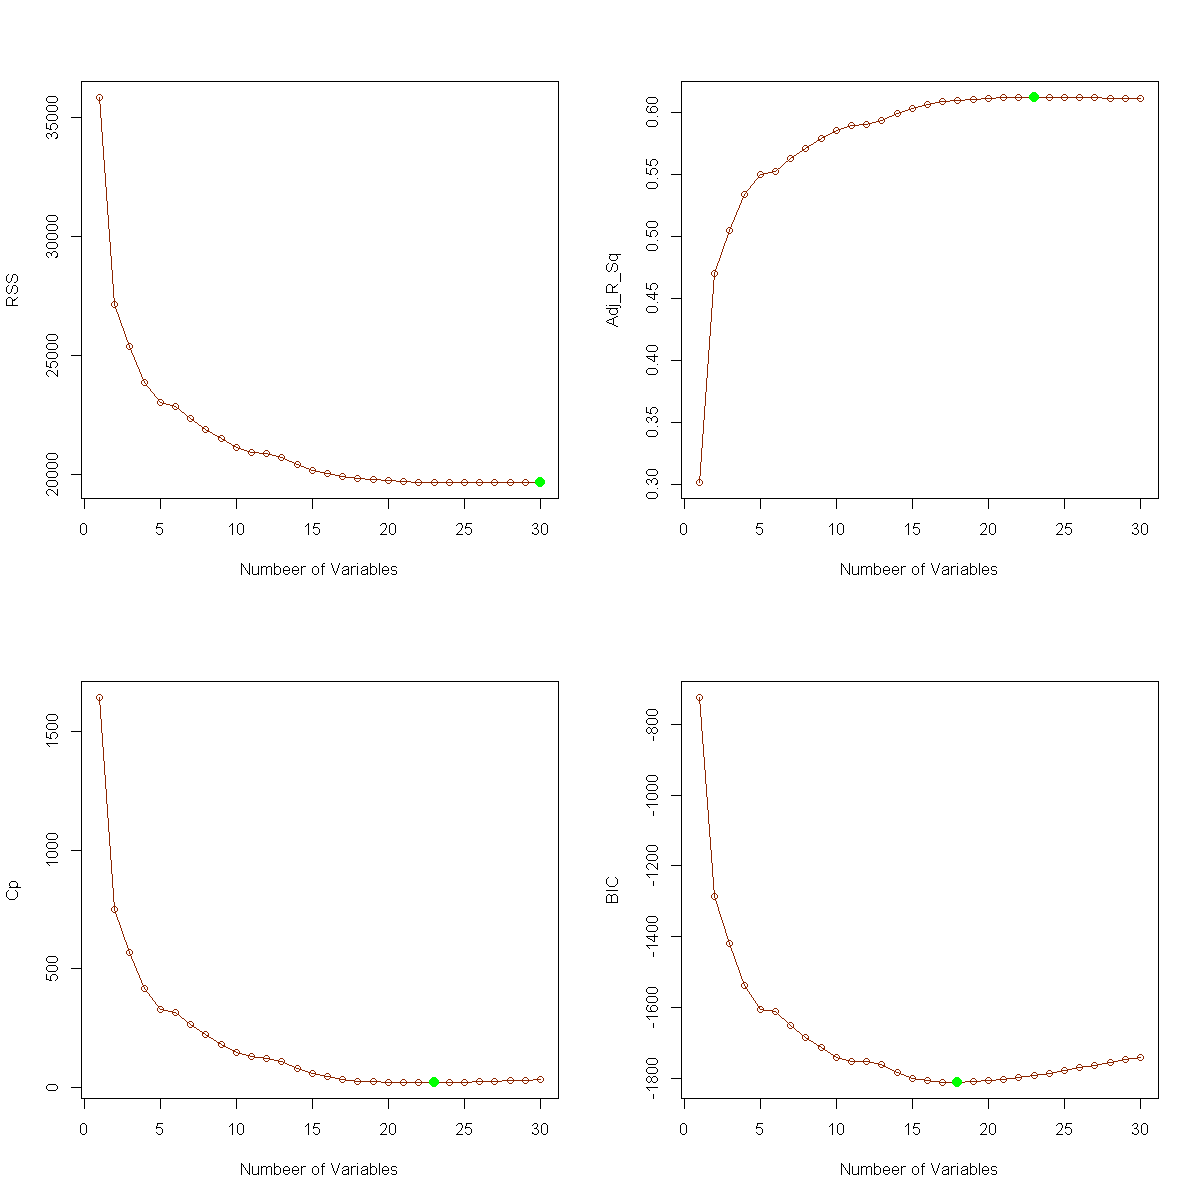

In [58]:
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow=c(2,2))

plot(reg.summary.bwd$rss, xlab="Numbeer of Variables", ylab = "RSS", type = "o",col="orangered4")
points(which.min(reg.summary.bwd$rss),reg.summary.bwd$rss[which.min(reg.summary.bwd$rss)],col="green", cex=2, pch=20)

plot(reg.summary.bwd$adjr2, xlab="Numbeer of Variables", ylab = "Adj_R_Sq", type = "o",col="orangered4")
points(which.max(reg.summary.bwd$adjr2),reg.summary.bwd$adjr2[which.max(reg.summary.bwd$adjr2)],col="green", cex=2, pch=20)

plot(reg.summary.bwd$cp, xlab="Numbeer of Variables", ylab = "Cp", type = "o",col="orangered4")
points(which.min(reg.summary.bwd$cp),reg.summary.bwd$cp[which.min(reg.summary.bwd$cp)],col="green", cex=2, pch=20)

plot(reg.summary.bwd$bic, xlab="Numbeer of Variables", ylab = "BIC", type = "o",col="orangered4")
points(which.min(reg.summary.bwd$bic),reg.summary.bwd$bic[which.min(reg.summary.bwd$bic)],col="green", cex=2, pch=20)

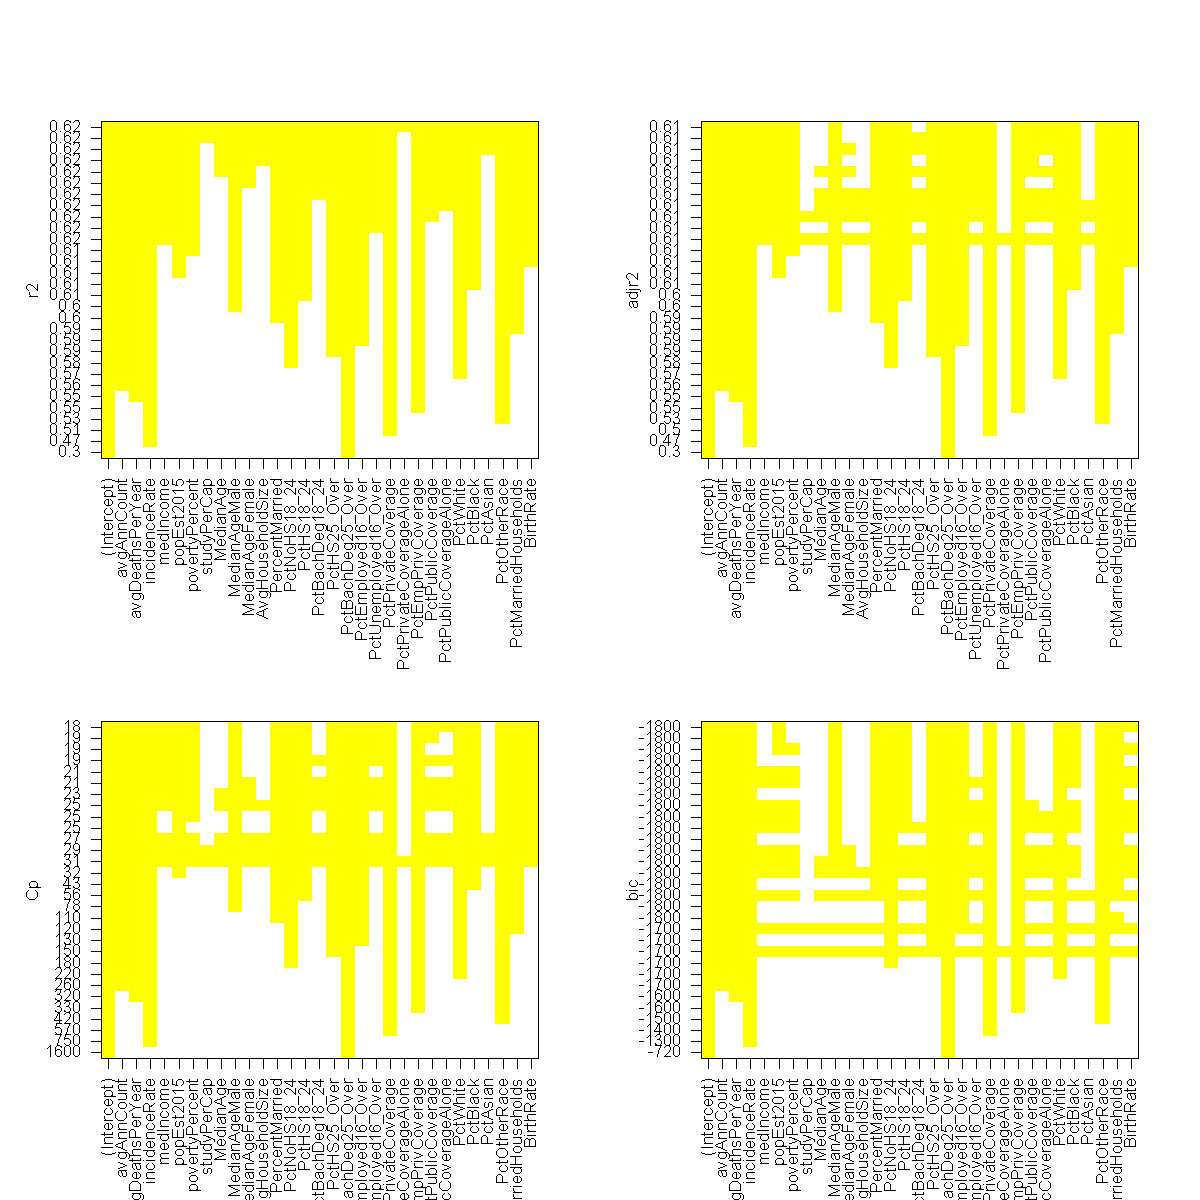

In [59]:
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow=c(2,2))
plot(regit.bwd,scale = "r2",col="yellow")
plot(regit.bwd,scale = "adjr2",col="yellow")
plot(regit.bwd,scale = "Cp",col="yellow")
plot(regit.bwd,scale = "bic",col="yellow")

In [60]:
coeff_23_bck <- names(coef(regit.bwd,23))
print(coeff_23_bck)

 [1] "(Intercept)"            "avgAnnCount"            "avgDeathsPerYear"      
 [4] "incidenceRate"          "medIncome"              "popEst2015"            
 [7] "povertyPercent"         "MedianAgeMale"          "PercentMarried"        
[10] "PctNoHS18_24"           "PctHS18_24"             "PctHS25_Over"          
[13] "PctBachDeg25_Over"      "PctEmployed16_Over"     "PctUnemployed16_Over"  
[16] "PctPrivateCoverage"     "PctEmpPrivCoverage"     "PctPublicCoverage"     
[19] "PctPublicCoverageAlone" "PctWhite"               "PctBlack"              
[22] "PctOtherRace"           "PctMarriedHouseholds"   "BirthRate"             


In [61]:
coeff_23_bck[1] <- "TARGET_deathRate"

lm.fit7 = lm(TARGET_deathRate~.,data=cancer_train[,coeff_23_bck])
lm.predict7=predict(lm.fit7,cancer_test)

EM[8,1] = "Linear Regression 8"
EM[8,2] = MAPE(cancer_test$TARGET_deathRate, lm.predict7)
EM[8,3] = summary(lm.fit7)$r.squared
EM[8,4] = summary(lm.fit7)$adj.r.squared
EM[8,5] = MSE(cancer_test$TARGET_deathRate,lm.predict7)
EM[8,6] = "Regression with Backward Selection, 23 variables"
EM[1:8,]

Method,MAPE,R_Square,Adj_R_Square,MSE,Remarks
Linear Regression 1,8.223226,0.5229450,0.5181295,367.098958,Regression after Data Pre-processing without dividing test and training set
Linear Regression 2,6.522762,0.6231021,0.6186593,210.226606,Regression after Cleaning Leverage and Outliers but without dividing test and training set
Linear Regression 3,6.359571,0.6164169,0.6107454,196.368942,Regression after dividing test and training set
Linear Regression 4,4.561192,0.6036058,0.6001100,8.817407,Regression after assumptions checking
Linear Regression 5,4.551824,0.6168652,0.6125371,8.720604,Regression with Subset Selection
Linear Regression 6,4.551824,0.6168652,0.6125371,8.720604,"Regression with Forward Selection, 23 variables"
Linear Regression 7,4.537356,0.6148238,0.6110457,8.712905,"Regression with Forward Selection, 20 variables"
Linear Regression 8,4.551824,0.6168652,0.6125371,8.720604,"Regression with Backward Selection, 23 variables"


In [62]:
coeff_18_bck <- names(coef(regit.bwd,18))
print(coeff_18_bck)

 [1] "(Intercept)"          "avgAnnCount"          "avgDeathsPerYear"    
 [4] "incidenceRate"        "popEst2015"           "MedianAgeMale"       
 [7] "PercentMarried"       "PctNoHS18_24"         "PctHS18_24"          
[10] "PctHS25_Over"         "PctBachDeg25_Over"    "PctEmployed16_Over"  
[13] "PctPrivateCoverage"   "PctEmpPrivCoverage"   "PctWhite"            
[16] "PctBlack"             "PctOtherRace"         "PctMarriedHouseholds"
[19] "BirthRate"           


In [63]:
coeff_18_bck[1] <- "TARGET_deathRate"

lm.fit8 = lm(TARGET_deathRate~.,data=cancer_train[,coeff_18_bck])
lm.predict8=predict(lm.fit8,cancer_test)

EM[9,1] = "Linear Regression 9"
EM[9,2] = MAPE(cancer_test$TARGET_deathRate, lm.predict8)
EM[9,3] = summary(lm.fit8)$r.squared
EM[9,4] = summary(lm.fit8)$adj.r.squared
EM[9,5] = MSE(cancer_test$TARGET_deathRate,lm.predict8)
EM[9,6] = "Regression with Backward Selection, 18 variables"
EM[1:9,]

Method,MAPE,R_Square,Adj_R_Square,MSE,Remarks
Linear Regression 1,8.223226,0.5229450,0.5181295,367.098958,Regression after Data Pre-processing without dividing test and training set
Linear Regression 2,6.522762,0.6231021,0.6186593,210.226606,Regression after Cleaning Leverage and Outliers but without dividing test and training set
Linear Regression 3,6.359571,0.6164169,0.6107454,196.368942,Regression after dividing test and training set
Linear Regression 4,4.561192,0.6036058,0.6001100,8.817407,Regression after assumptions checking
Linear Regression 5,4.551824,0.6168652,0.6125371,8.720604,Regression with Subset Selection
Linear Regression 6,4.551824,0.6168652,0.6125371,8.720604,"Regression with Forward Selection, 23 variables"
Linear Regression 7,4.537356,0.6148238,0.6110457,8.712905,"Regression with Forward Selection, 20 variables"
Linear Regression 8,4.551824,0.6168652,0.6125371,8.720604,"Regression with Backward Selection, 23 variables"
Linear Regression 9,4.533508,0.6134833,0.6100745,8.777549,"Regression with Backward Selection, 18 variables"


# 14. Validation Set Approach

### By validation set approach , we get minimum errors when number of variables are 22.

In [64]:
train_1 <- sample(c(TRUE,FALSE), nrow(cancer_train), rep = TRUE)
test_1 <- (!train_1)

In [65]:
regfit.best <- regsubsets(TARGET_deathRate~., data = cancer_train[train_1,], nvmax = 30)
test.mat <- model.matrix(TARGET_deathRate~., data = cancer_train[test_1,])

In [66]:
val.errors <- rep(NA,30)
for (i in 1:30){
  coefi <- coef(regfit.best, id = i)
  pred <- test.mat[,names(coefi)]%*%coefi
  val.errors[i] <- mean((cancer_train$TARGET_deathRate[test_1]-pred)^2)
}

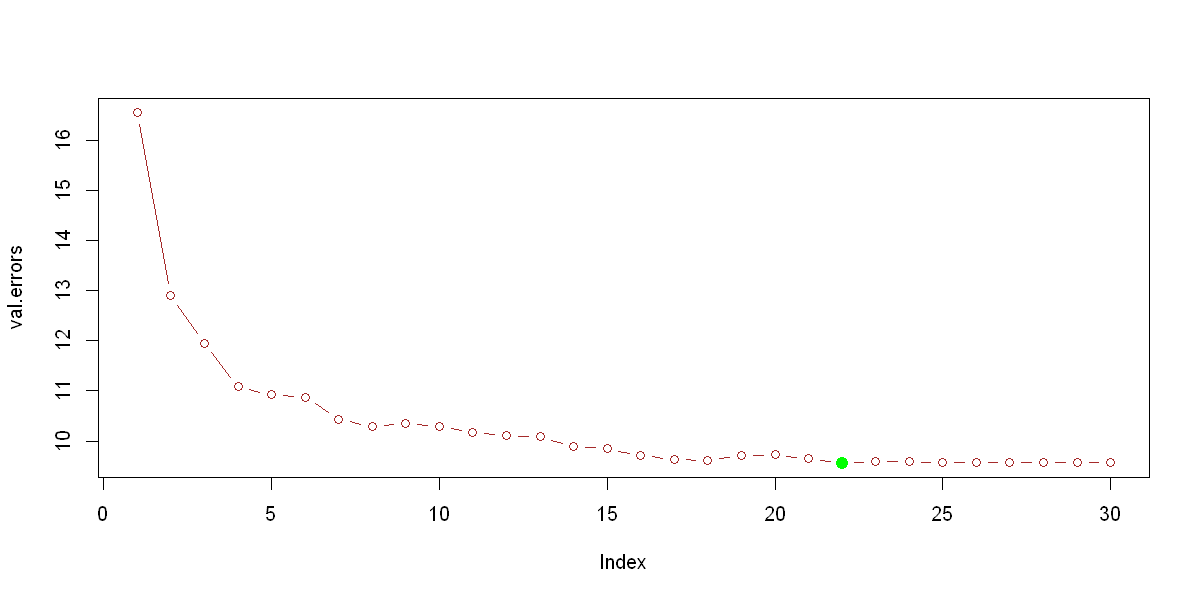

In [67]:
options(repr.plot.width = 10, repr.plot.height = 5)
plot(val.errors,type='b',col="brown")
points(which.min(val.errors),val.errors[22],col="green", cex=2, pch=20)

In [68]:
regfit.best_1 <- regsubsets(TARGET_deathRate~., data = cancer_train, nvmax = 30)
coeff_22_vsa <- names(coef(regfit.best_1,22))
coeff_22_vsa[1] <- "TARGET_deathRate"
print(coeff_22_vsa)

 [1] "TARGET_deathRate"     "avgAnnCount"          "avgDeathsPerYear"    
 [4] "incidenceRate"        "medIncome"            "popEst2015"          
 [7] "povertyPercent"       "MedianAgeMale"        "PercentMarried"      
[10] "PctNoHS18_24"         "PctHS18_24"           "PctHS25_Over"        
[13] "PctBachDeg25_Over"    "PctEmployed16_Over"   "PctUnemployed16_Over"
[16] "PctPrivateCoverage"   "PctEmpPrivCoverage"   "PctPublicCoverage"   
[19] "PctWhite"             "PctBlack"             "PctOtherRace"        
[22] "PctMarriedHouseholds" "BirthRate"           


In [69]:
lm.fit9 = lm(TARGET_deathRate~.,data=cancer_train[,coeff_22_vsa])
lm.predict9=predict(lm.fit9,cancer_test)

EM[10,1] = "Linear Regression 10"
EM[10,2] = MAPE(cancer_test$TARGET_deathRate, lm.predict9)
EM[10,3] = summary(lm.fit9)$r.squared
EM[10,4] = summary(lm.fit9)$adj.r.squared
EM[10,5] = MSE(cancer_test$TARGET_deathRate,lm.predict9)
EM[10,6] = "Regression with Validation Set Approach"
EM[1:10,]

Method,MAPE,R_Square,Adj_R_Square,MSE,Remarks
Linear Regression 1,8.223226,0.5229450,0.5181295,367.098958,Regression after Data Pre-processing without dividing test and training set
Linear Regression 2,6.522762,0.6231021,0.6186593,210.226606,Regression after Cleaning Leverage and Outliers but without dividing test and training set
Linear Regression 3,6.359571,0.6164169,0.6107454,196.368942,Regression after dividing test and training set
Linear Regression 4,4.561192,0.6036058,0.6001100,8.817407,Regression after assumptions checking
Linear Regression 5,4.551824,0.6168652,0.6125371,8.720604,Regression with Subset Selection
Linear Regression 6,4.551824,0.6168652,0.6125371,8.720604,"Regression with Forward Selection, 23 variables"
Linear Regression 7,4.537356,0.6148238,0.6110457,8.712905,"Regression with Forward Selection, 20 variables"
Linear Regression 8,4.551824,0.6168652,0.6125371,8.720604,"Regression with Backward Selection, 23 variables"
Linear Regression 9,4.533508,0.6134833,0.6100745,8.777549,"Regression with Backward Selection, 18 variables"
Linear Regression 10,4.538696,0.6162686,0.6121243,8.695330,Regression with Validation Set Approach


# 15. Cross Validation Approach

### By cross validation set approach , we get minimum errors when number of variables are 23, which was already used in the subset selection. So we can't consider this model again.

In [70]:
k=10
folds = sample(1:k, nrow(cancer_train), replace = TRUE)
cv.errors = matrix(NA,k,30, dimnames = list(NULL, paste(1:30)))
test.mat.1 <- model.matrix(TARGET_deathRate~., data = cancer_train)

for (j in 1:k){
  best.fit = regsubsets(TARGET_deathRate~., data = cancer_train[folds!=j, ], nvmax = 30)
  for (i in 1:30){
    coefi <- coef(best.fit, id = i)
    pred_cv <- test.mat.1[folds==j,names(coefi)]%*%coefi
    cv.errors[j,i] = mean((cancer_train$TARGET_deathRate[folds==j]-pred_cv)^2)
  }
}

mean.cv.errors = apply(cv.errors, 2, mean)

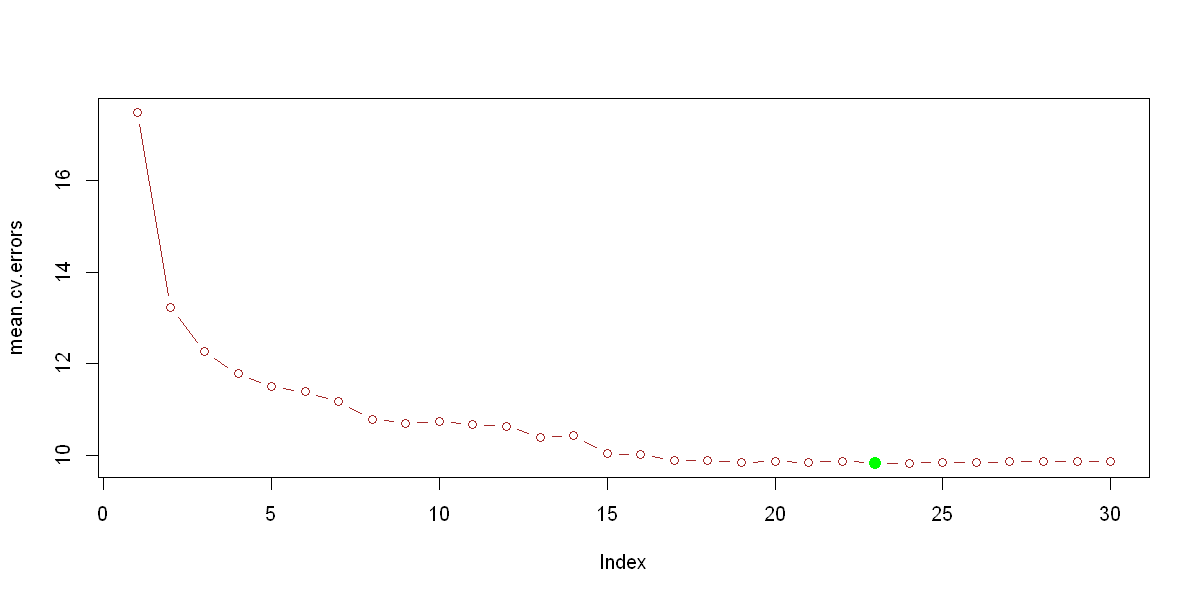

In [71]:
options(repr.plot.width = 10, repr.plot.height = 5)
plot(mean.cv.errors,type='b',col="brown")
points(which.min(mean.cv.errors),mean.cv.errors[23],col="green", cex=2, pch=20)

# 16. Ridge Regression

### By ridge regression and cross validation we get following results for the ridge regression.

In [72]:
grid = 10^seq(10,-2,length=200)

x=model.matrix(TARGET_deathRate~.,cancer_train)[,-3]
y=cancer_train$TARGET_deathRate

test.mat.2 <- model.matrix(TARGET_deathRate~.,cancer_test)[,-3]

cv.ridge = cv.glmnet(x,y,alpha=0,lambda = grid)

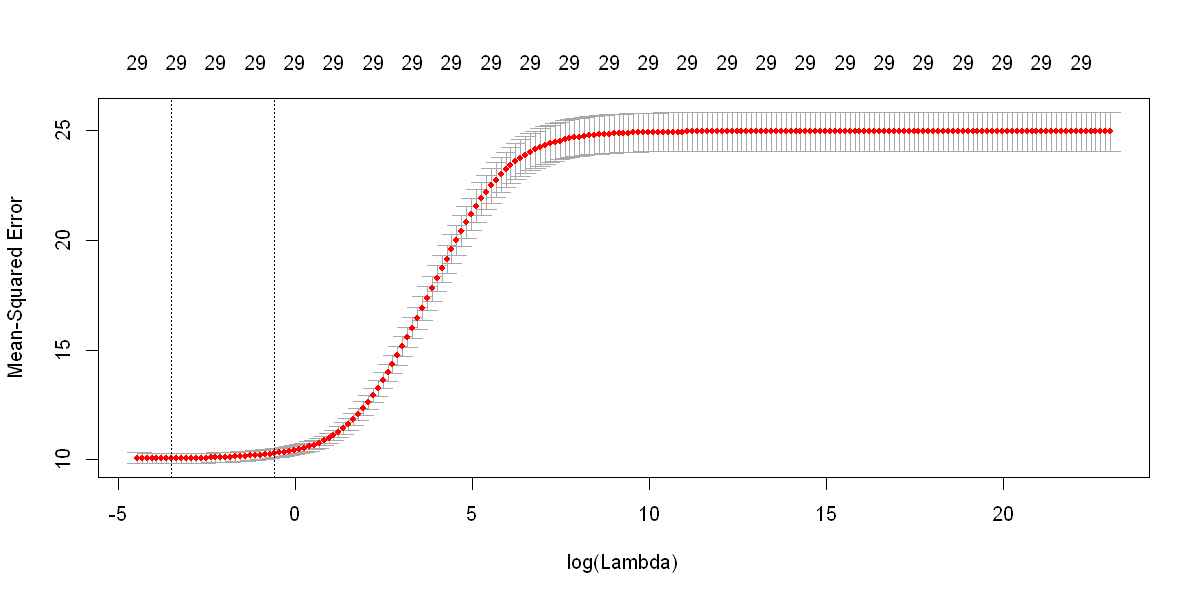

In [73]:
plot(cv.ridge)

In [74]:
cv.ridge$lambda.min
ridge.fit <- cv.ridge$glmnet.fit
ridge.pred <- predict(ridge.fit, s = cv.ridge$lambda.min, newx = test.mat.2)

[1] 0.03036771

In [75]:
rsq_1 <- 1 - ((sum((predict(ridge.fit, s = cv.ridge$lambda.min, newx = x) - y)^2))/(sum((y- mean(y))^2)))
adj_rsq_1 <- 1-(1-rsq_1)*(2059/2029)
EM[11,1] = "Ridge Regression"
EM[11,2] = MAPE(cancer_test$TARGET_deathRate, ridge.pred)
EM[11,3] = rsq_1
EM[11,4] = adj_rsq_1
EM[11,5] = MSE(cancer_test$TARGET_deathRate,ridge.pred)
EM[11,6] = "Regression with Ridge Method"
EM[1:11,]

Method,MAPE,R_Square,Adj_R_Square,MSE,Remarks
Linear Regression 1,8.223226,0.5229450,0.5181295,367.098958,Regression after Data Pre-processing without dividing test and training set
Linear Regression 2,6.522762,0.6231021,0.6186593,210.226606,Regression after Cleaning Leverage and Outliers but without dividing test and training set
Linear Regression 3,6.359571,0.6164169,0.6107454,196.368942,Regression after dividing test and training set
Linear Regression 4,4.561192,0.6036058,0.6001100,8.817407,Regression after assumptions checking
Linear Regression 5,4.551824,0.6168652,0.6125371,8.720604,Regression with Subset Selection
Linear Regression 6,4.551824,0.6168652,0.6125371,8.720604,"Regression with Forward Selection, 23 variables"
Linear Regression 7,4.537356,0.6148238,0.6110457,8.712905,"Regression with Forward Selection, 20 variables"
Linear Regression 8,4.551824,0.6168652,0.6125371,8.720604,"Regression with Backward Selection, 23 variables"
Linear Regression 9,4.533508,0.6134833,0.6100745,8.777549,"Regression with Backward Selection, 18 variables"
Linear Regression 10,4.538696,0.6162686,0.6121243,8.695330,Regression with Validation Set Approach


# 17. Lasso Regression

### By lasso regression and cross validation we get following results for the lasso regression.

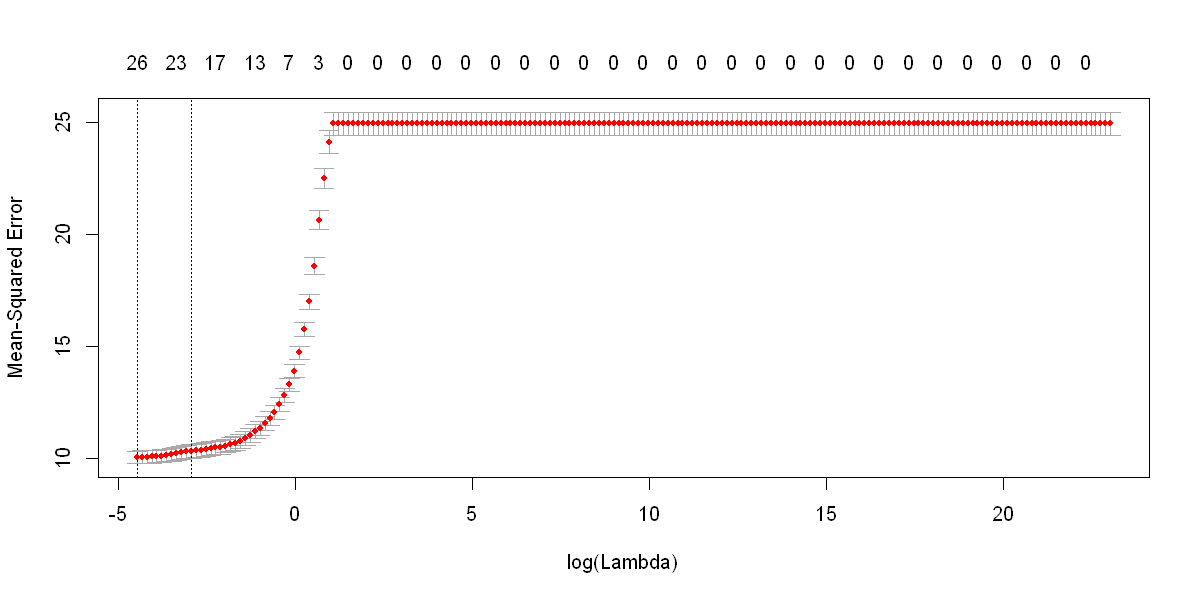

In [76]:
cv.lasso = cv.glmnet(x,y,alpha=1,lambda = grid)
plot(cv.lasso)

In [77]:
cv.lasso$lambda.min
lasso.fit <- cv.lasso$glmnet.fit
summary(predict(lasso.fit, s = cv.lasso$lambda.min, type = "coefficients")[1:31,] == 0)
lasso.pred <- predict(lasso.fit, s = cv.lasso$lambda.min, newx = test.mat.2)

[1] 0.01148951

   Mode   FALSE    TRUE 
logical      27       4 

In [78]:
rsq_2 <- 1 - ((sum((predict(lasso.fit, s = cv.lasso$lambda.min, newx = x) - y)^2))/(sum((y- mean(y))^2)))
adj_rsq_2 <- 1-(1-rsq_2)*(2059/2029)
EM[12,1] = "Lasso Regression"
EM[12,2] = MAPE(cancer_test$TARGET_deathRate, lasso.pred)
EM[12,3] = rsq_2
EM[12,4] = adj_rsq_2
EM[12,5] = MSE(cancer_test$TARGET_deathRate,lasso.pred)
EM[12,6] = "Regression with Lasso Method"
EM[1:12,]

Method,MAPE,R_Square,Adj_R_Square,MSE,Remarks
Linear Regression 1,8.223226,0.5229450,0.5181295,367.098958,Regression after Data Pre-processing without dividing test and training set
Linear Regression 2,6.522762,0.6231021,0.6186593,210.226606,Regression after Cleaning Leverage and Outliers but without dividing test and training set
Linear Regression 3,6.359571,0.6164169,0.6107454,196.368942,Regression after dividing test and training set
Linear Regression 4,4.561192,0.6036058,0.6001100,8.817407,Regression after assumptions checking
Linear Regression 5,4.551824,0.6168652,0.6125371,8.720604,Regression with Subset Selection
Linear Regression 6,4.551824,0.6168652,0.6125371,8.720604,"Regression with Forward Selection, 23 variables"
Linear Regression 7,4.537356,0.6148238,0.6110457,8.712905,"Regression with Forward Selection, 20 variables"
Linear Regression 8,4.551824,0.6168652,0.6125371,8.720604,"Regression with Backward Selection, 23 variables"
Linear Regression 9,4.533508,0.6134833,0.6100745,8.777549,"Regression with Backward Selection, 18 variables"
Linear Regression 10,4.538696,0.6162686,0.6121243,8.695330,Regression with Validation Set Approach


# 18. Conclusion

In [79]:
EM[which.min(EM[3:12,2]),6]

[1] "Regression with Forward Selection, 20 variables"

### Using the MAPE value we can conclude that "Regression with Forward Selection, 20 variables" gives minimum MAPE value. This model can be used for prediction purpose.